# A Dispersed World

In [1]:
import arviz as az
import bambi as bmb
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm

from matplotlib.lines import Line2D
from matplotlib.patches import FancyArrowPatch, Patch
from scipy import stats
from scipy.special import expit

In [2]:
def adjust_lightness(color, amount=0.5):
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], c[1] * amount, c[2])

In [3]:
def plot_ppc_discrete(idata, bins, ax):
    
    def add_discrete_bands(x, lower, upper, ax, **kwargs):
        for i, (l, u) in enumerate(zip(lower, upper)):
            s = slice(i, i + 2)
            ax.fill_between(x[s], [l, l], [u, u], **kwargs)

    var_name = list(idata.observed_data.data_vars)[0]
    y_obs = idata.observed_data[var_name].to_numpy()
    
    counts_list = []
    for draw_values in az.extract(idata, "posterior_predictive")[var_name].to_numpy().T:
        counts, _ = np.histogram(draw_values, bins=bins)
        counts_list.append(counts)
    counts_arr = np.stack(counts_list)

    qts_90 = np.quantile(counts_arr, (0.05, 0.95), axis=0)
    qts_70 = np.quantile(counts_arr, (0.15, 0.85), axis=0)
    qts_50 = np.quantile(counts_arr, (0.25, 0.75), axis=0)
    qts_30 = np.quantile(counts_arr, (0.35, 0.65), axis=0)
    median = np.quantile(counts_arr, 0.5, axis=0)

    colors = [adjust_lightness("C0", x) for x in [1.8, 1.6, 1.4, 1.2, 0.9]]

    add_discrete_bands(bins, qts_90[0], qts_90[1], ax=ax, color=colors[0])
    add_discrete_bands(bins, qts_70[0], qts_70[1], ax=ax, color=colors[1])
    add_discrete_bands(bins, qts_50[0], qts_50[1], ax=ax, color=colors[2])
    add_discrete_bands(bins, qts_30[0], qts_30[1], ax=ax, color=colors[3])

    
    ax.step(bins[:-1], median, color=colors[4], lw=2, where="post")
    ax.hist(y_obs, bins=bins, histtype="step", lw=2, color="black", align="mid")
    handles = [
        Line2D([], [], label="Observed data", color="black", lw=2),
        Line2D([], [], label="Posterior predictive median", color=colors[4], lw=2)
    ]
    ax.legend(handles=handles)
    return ax

In [4]:
%matplotlib inline
plt.style.use("intuitivebayes.mplstyle")

mpl.rcParams["figure.dpi"] = 120
mpl.rcParams["figure.facecolor"] = "white"
mpl.rcParams["axes.spines.left"] = False
FIGSIZE = (9, 5)

## 12 segundos de oscuridad

* Learning complicated things is hard.

* We'll get right into the overdispersion darkness.

## Unanticipated consequences

* Exploring a new dataset!

* A Poisson regression model

* Overdispersion comes into scene

## What's the deal with overdispersion

* What is overdispersion?

* Why is it a problem?

* The Poisson distribution can be too simple 

## When the whole is more than the sum of the parts

* Engineering new distributions

* The Gamma-Poisson distribution

* The Negative Binomial distribution

## Negative Binomial regression

* A new model family

* A model in math and code

* Posterior predictive checks

* The conditional posterior predictive distribution

## Oversidpersion for all

* Another dataset: student admissions

* A binomial model

* Overdispersion, again

* Overdispersion can affect estimations we care

## Beta-Binomial to the rescue

* Handcrafting another distribution

* The Beta-Binomial distribution

* Understanding distribution parameters

## The Beta-Binomial model in action

* Setting priors that make sense

* Beta-Binomial model in Bambi

* Comparison of effect estimation

## Counting grasshoppers

* Another dataset? Yes, grasshoppers

* Binomial regression

* Forest plots

* Posterior predictive distributions

## Beta-Binomial for grasshoppers

* Beta-binomial regression with more predictors

* Priors that make sense

* Inference comparison

* Posterior predictive checks

# 12 segundos de oscuridad

## 12 segundos de oscuridad

<center>
  <img src="imgs/12_segundos.jpeg" style="width:450px"; class="w-45p"/>
</center>

What's in the title?! Am I also supposed to learn Spanish?! Keep calm, you're not 😄

12 segundos de oscuridad, which means _12 seconds of darkness_, is a song by the Uruguayan singer Jorge Drexler. The 12 seconds refer to the time that elapses between the beams of light from a particular lighthouse that inspired him to write the song.

Like many of Drexler's songs, 12 segundos de oscuridad comes with a very deep message. To move in the dark of the night you have to use the lighthouse as a guide. Each beam of light tells you where the lighthouse is, so you know the distance to the coast. However, the 12 seconds of darkness are also important because they allow you to identify this particular lighthouse so you can move in the right direction (other lighthouses can have different cycles).

## Light and dark in our stats journey

<center>
  <img src="imgs/light_and_dark.jpg" style="width:500px"; class="w-60p"/>
</center>

How does this relate to learning stats? Tomás, you're confusing me!

In many aspects of life there are ups and downs, eureka moments and moments of confusion: light and dark.

In statistics, we wish it was just 12 seconds of darkness. It feels like we are always in the dark! The convoluted math, so many terms and concepts, words that represent different things depending on who's talking, tons of words that mean the same thing, and so many software choices. It's a mess. Impossible not to be in the dark!

But every time something makes sense, every time we learn something new, that feels so nice. Like all the pain is worth it.

## Moments of dark are important

<center>
  <img src="imgs/frustrating_study.jpg" style="width:600px"; class="w-65p"/>
</center>

Learning complicated things is hard. More and better educational content is created and a lot of people are making it more accessible to more people. But at some point it always gets hard (because it's difficult!).

When we explore a new dataset and the EDA doesn't make sense at all, when you work with a new model and it doesn't run, or it runs but results are so weird. When you are completely unsure about what you're doing, but you keep trying. Those are all moments of darkness in the song. 

The questions we make, the things we investigate, and the alternatives we try... That's what allows us to move forward.

## There's always light after all

<center>
  <img src="imgs/exciting_study.jpg" style="width:600px"; class="w-65p"/>
</center>

And after the 12 seconds of darkness, there's light. All the pieces fit together and it just makes sense... It feels so fulfilling. 

But we don't learn all at once in that eureka moment. It's all the work it took, the journey, where we actually learn. It's during the moment of dark. 

And for us, 12 seconds is what we make it to be. Or what the problem demands it to be. But light doesn't happen on its own. We are the ones that make it happen. At Intuitive Bayes, we're here to help you do so. 

## We'll get right into the dark

<center>
  <img src="imgs/jumping_water.jpg" style="width:600px"; class="w-65p"/>
</center>

Photo by <a href="https://unsplash.com/@andrewfs?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Andrew Sharples</a> on <a href="https://unsplash.com/photos/ZnEtdgEBsSw?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>
  

In this lesson we will be covering just a single problem: overdispersion.

It can appear in many different ways, in many different scenarios. That's why we dedicate it an entire lesson. 

We'll get right into the overdispersion darkness. Get prepared to work with different datasets and different models. We will feel confused sometimes. We will have lots of questions as we move on. But in the end, we'll make light happen. 

What does it sound like? Are you in?

## Section Recap

* We learn a lot while trying to figure out something that doesn't make sense
* This lesson is about a single problem that can appear in many flavors: overdispersion
* There will be many problems, datasets and models. Get ready to work hard!
* We're going to make sense of all it.

We are really packed in this lesson. We're going to hop through 4 distributions and 5 datasets.

The lighthouse is about to emit light and we're just in the right place, don't miss out!

# Unanticipated consequences

Fact: We are problem-solvers (and we love it). Solving problems is always exciting. But we don't know much about today's problem yet. Its name is overdispersion, but what is it?

## A new dataset!

<center>
  <img src="imgs/happy_jonah.gif" style="width:600px" class="w-55p"; />
</center>

Applied problems require data. Let's introduce a new dataset!

<!--
We're going to figure this out while we solve an applied problem. 
And you know what? Applied problems require data! 
So this can only mean one thing: we need to introduce a new dataset
-->

## Fish species diversity

<center>
  <img src="imgs/take_my_money_fish.png" style="width:600px" class="w-70p"; />
</center>

We have used the fish market dataset in two previous lessons of this course. Since it was very successful, we decided to give you more of it. Isn't it a great idea?

<!-- 
The meme could describe IB instructors very well! We used the fish market dataset in two previous lessons.
Someone told me you loved working with fish data so much that you couldn't wait to see another fish dataset. Your wish is my command :)
-->

## Fish species diversity in lakes

In [5]:
data = pd.read_csv("data/lakes.csv")
data.head()

,fish,lake_area
0,10,5
1,37,41
2,60,171
3,113,25719
4,99,59596


In [6]:
print(data.shape)

(70, 2)


Leaving jokes aside, this a brand new problem with completely unrelated fish. It's a quite cool dataset, believe me 😉

The **lakes** dataset contains the number of different fish species (`fish`) found in 70 lakes around the world, together with the lake area in squared kilometers (`lake_area`).

The difference is that these fish are lucky, they don't end up in the fish market. In this play, we put on our biologist hats with the goal to fully understand how the area of a lake is associated with fish diversity. 

Sounds exciting!

<!-- 
Joking aside, yes, this is fish data. No, it's not the same fish. This is completely unrelated fish and completely unrelated measurements.

The **lakes** dataset contains the number of different fish species (`fish`) found in 70 lakes around the world, together with the lake area in squared kilometers (`lake_area`).

So yeah, it's about fish again. But these fish don't end up in any fish market. Here, we put on our biologist hats to fully understand how the lake area is associated with fish diversity. It's so exciting!
-->

## What the data looks like

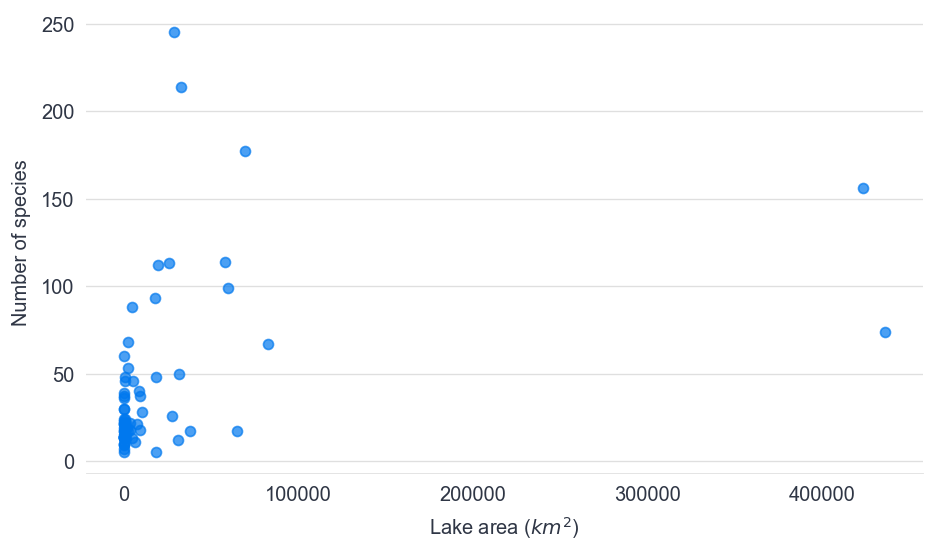

In [7]:
fig, ax = plt.subplots(figsize=FIGSIZE)
ax.scatter(data["lake_area"], data["fish"], alpha=0.7)
ax.set(xlabel="Lake area ($km^2$)", ylabel="Number of species");

Alright, it's time to visualize the data. Since we are working with two numeric variables, a scatterplot seems to be the right tool for the job. All we need is just a little bit of Matplotlib.

Stuff happens. Plots in real life are quite often different from those in books (or online courses 😅). This is simply because variables can be associated in so many and so weird different ways that not-so-nice scatterplots are more the rule than the exception.

One of the problems is that the range of variation in the lake area is huge. There are a lot of small and medium sized lakes, but only a few that are really big. What's more, two lakes really stand out from the rest -- their areas are above 400000 squared kilometers!

🤓 **Notes for the nerd** 🤓 The two largest lakes aren't actually lakes. They are the Black Sea with an area of 423000 squared kilometers, and the Caspian Sea with an area of 436000 squared kilometers as reported in "Fish species diversity in lakes", the paper where the data is taken from.

## What the data looks like (transformed version)

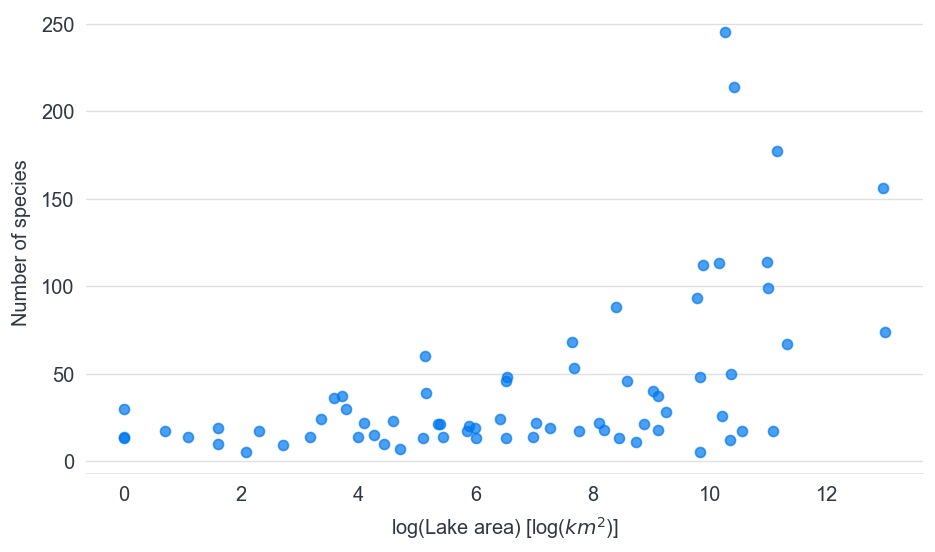

In [8]:
fig, ax = plt.subplots(figsize=FIGSIZE)
ax.scatter(np.log(data["lake_area"]), data["fish"], alpha=0.7)
ax.set(xlabel="log(Lake area) [log($km^2$)]", ylabel="Number of species");

Things look more _reasonable_ after we apply the log-transformation to the lake area. We can see the larger the area of the lake, the larger the number of species, as expected.

This is just a rough description of the pattern, as the association between the variables is not deterministic. There are some lakes that are bigger than others and still have a smaller number of species. In the end, that's what makes things so interesting!

## Poisson in French is fish

* What's in common between...
    * Goals in the Premier League
    * The number of species in a lake?

* They're both counts!

* A count? I'll respond Poisson regression!

What do goals in the Premier League have to do with the number of fish species in a lake? They are both counts!

In the previous lesson, you learned how to model count outcomes while you modeled the number of goals scored in Premier League matches (by the way, I think it's the best league in the world). You created many regression models using a Poisson distribution for the response, and we called it Poisson regression.

But there's more! It's not a coincidence that Poisson in French is fish. Here we have a count response, the number of species in a lake, and we also have fish! The universe is sending us all the signals to use a Poisson regression model. Let's do it!

## Poisson à la Bambi

$$
\begin{aligned}
\beta_0 &\sim \text{Normal}(3.3, 1) \\
\beta_1 &\sim \text{Normal}(0, 1) \\
\eta_i  &= \beta_0 + \beta_1 \log(\text{area}_i) \\
\mu_i   &= \exp(\eta_i) \\
\text{fish}_i &\sim \text{Poisson}(\mu_i)
\end{aligned}
$$

In [9]:
priors = {
    "Intercept": bmb.Prior("Normal", mu=3.3, sigma=1), 
    "log(lake_area)": bmb.Prior("Normal", mu=0, sigma=1)
}
model = bmb.Model("fish ~ 1 + log(lake_area)", data, priors=priors, family="poisson")

**Notes**: The logarithm is the default link function when we use `family="poisson"`. So it's not needed to pass Bambi `link="log"` because it's already happening by default.

We want to build a Poisson regression model where the number of fish species is the response and the logarithm of area of the lake is the only predictor. We worked a lot with regression so far, so we know how to do it.

We have an intercept $\beta_0$ and a slope $\beta_1$. We assign them normal priors. The prior of the intercept is centered around the logarithm of the mean of the response, while the one for the slope is centered around zero. Since the mean parameter of the Poisson distribution must be positive, we transform the linear predictor $\eta$ using the exponential function which means we're using a log-link function. 

All of this convoluted explanation translates into a very simple code chunk once we use Bambi. We have a dictionary with the priors, the formula that states the response and the predictors, and the `family` argument where we say we want to use the `"poisson"` family.

## Model fit

In [10]:
idata = model.fit(chains=4, random_seed=121195)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [Intercept, log(lake_area)]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.


In [11]:
az.summary(idata)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,2.137,0.059,2.017,2.237,0.001,0.001,1862.0,1984.0,1.0
log(lake_area),0.206,0.006,0.194,0.218,0.000,0.000,2071.0,2229.0,1.0


Time to fit the model! At this point, we know very well how that works so we don't need to comment on that.

One thing we can look at is the parameter summary, although we won't be doing parameter interpretation. The posterior mean of the intercept is around 2.1 and its 94\% HDI ranges from 2.02 to 2.25, and the posterior mean for the log(area) slope is 0.206 with its HDI going from 0.193 to 0.218.

The effective sample sizes and the R-hats also look good. The first are in the order of the 2000 effective samples and both R-hats can be considered to be equal to 1, indicating good mixing between chains.

🚨 **Alert for the nerd!** 🚨 Above it says _"both R-hats **can be considered to be equal** to 1"_ but actually we see the values are equal to 1. What's going on? It turns out we see `1.0` because the numbers are rounded to two decimal places and `1.00` prints as `1.0`. However, we have to be aware the R-hat values are larger than 1. The difference is so small that it's negligible so there's also people saying "R-hat is equal to 1" and it's OK.

Do `az.rhat(idata)` or `az.rhat(idata).to_array()` and you'll see it 😉.

Also, have a look at the [ArviZ Documentation on R-hat](https://python.arviz.org/en/stable/api/generated/arviz.rhat.html).

## Posterior predictive checks

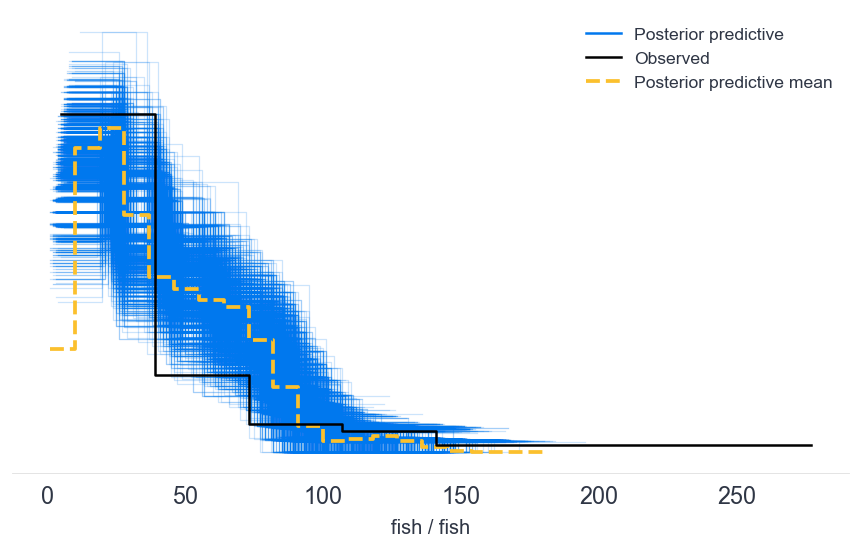

In [12]:
model.predict(idata, kind="pps")
az.plot_ppc(idata, backend_kwargs={"figsize": FIGSIZE});

Let's have a look at the posterior predictive distribution. We want to see if it resembles the observed distribution or not.

Damn, it's not easy to analyze this plot. The histograms we get for the different draws of the posterior predictive distribution are based on different bins. It's like someone is constantly moving the goal, so it's making it hard to score.

One alternative is to rebuild the visualization manually. How does it sound like? Challenge accepted!

**Animation note:** Show the plot right before the "damn"

## Manual posterior predictive checks -- because we can

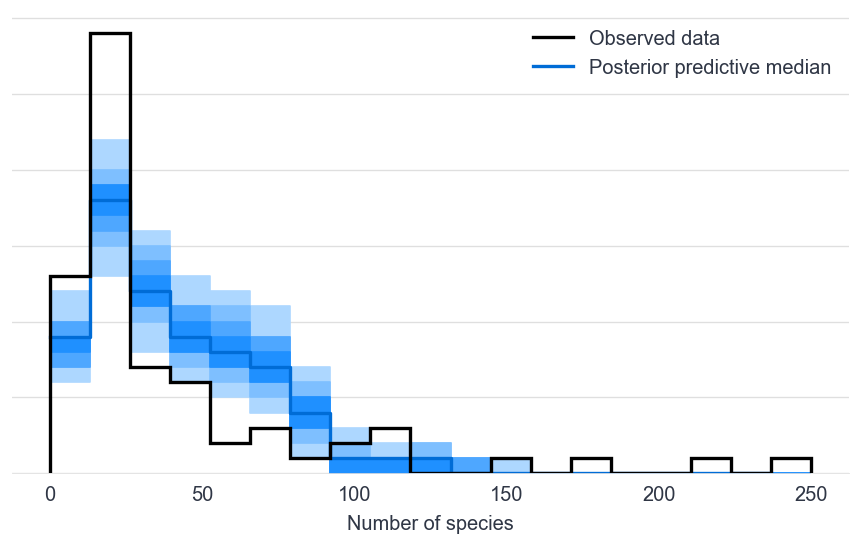

In [13]:
bins = np.linspace(0, 250, num=20)
fig, ax = plt.subplots(figsize=FIGSIZE)
plot_ppc_discrete(idata, bins, ax)
ax.set(xlabel="Number of species", yticklabels=[]);

Looks better, for sure. But it is still not that easy to read.

It's not all lost, however. We have a predictor and we can do something with it. Let's inspect the conditional posterior predictive distribution for the different lake sizes.

## The conditional posterior predictive distribution

In [14]:
# First, generate a new dataset where the "lake_area" spans the entire observed range
# It's done in the transformed scale so the points are equally spaced in that scale
lake_area_grid = np.exp(np.linspace(0.01, np.max(np.log(data["lake_area"])), num=200))
new_data = pd.DataFrame({"lake_area": lake_area_grid})

# Get the posterior predictive distribution for the new observations
model.predict(idata, kind="pps", data=new_data)

In [15]:
idata

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

Regression is always about modeling conditional distributions (although it's usually very implicit in our notation). So we can inspect the posterior predictive distribution for the different values in the predictor, thus the name **conditional** posterior predictive distribution makes sense.

## The conditional posterior predictive distribution - The plot

In [16]:
# Compute the mean and the 95% equally tailed credible interval
line_mean = (
    idata.posterior_predictive["fish"].mean(("chain", "draw")).to_numpy()
)
line_bounds = (
    idata.posterior_predictive["fish"].quantile((0.025, 0.975), ("chain", "draw")).to_numpy()
)
x_values = np.log(new_data["lake_area"])

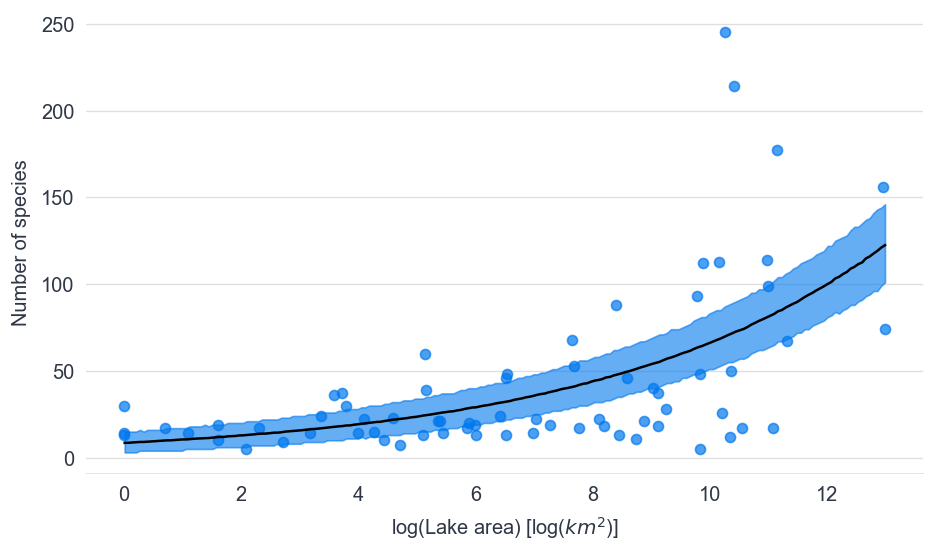

In [17]:
fig, ax = plt.subplots(figsize=FIGSIZE)
ax.scatter(np.log(data["lake_area"]), data["fish"], alpha=0.7)
ax.plot(x_values, line_mean, color="black")
ax.fill_between(x_values, line_bounds[0], line_bounds[1], color="C0", alpha=0.6)
ax.set(xlabel="log(Lake area) [log($km^2$)]", ylabel="Number of species");

To get a sense of the posterior predictive distribution for the different lake areas, it's enough to plot the mean (black line) and a band that represents the 95% credible interval (blue area). 

The mean line follows the center of the cloud of points very well. It's hard to imagine a better curve fitting the data. That's the good part!

However, see the uncertainty in the posterior predictive distribution. The band is too tight! The uncertainty in the posterior predictive distribution is not able to capture all the uncertainty in the data...That's one really bad part! 

Oh no!

## Here we go again

<center>
  <img src="imgs/here_we_go_again.jpg" style="width:600px" class="w-70p"; />
</center>

Did you see it coming? We have seen all sorts of problems along the course. But I couldn't anticipate that. What a weird problem with the variability. It's so confusing... I'm tired of this!

But don't worry too much. At Intuitive Bayes, we get you covered. If we expose you to a challenging problem, it's because there's something better in the end. But before that, we need to understand better what the problem is about and why it's happening. 

Now, it's time for a section recap.

## Section Recap

* We have a new dataset: Fish diversity in lakes
    * The response is the number of fish in a lake
    * The predictor is the size of the lake
* Poisson regression is one of the most popular choices to model count data
* A model can be inadequate for many reasons
* Variability is also an important modeling aspect

# What's the deal with overdispersion

## So nice, so easy, so wrong...

<center>
  <img src="imgs/goes_sad.gif" style="width:600px" class="w-70p"; />
</center>

Step by step, we explored the data, understood the association between the variables, built a model, sampled from the posterior and everything was going on so well... even the mean fit was awesome. Until everything fell apart.

## What's wrong?

* The problem has to do with the **dispersion**

* That's a very vague description...

* Let's identify identify exactly what's going on

So what was the problem exactly? We still don't know all the details, but all indicates it has to do with the **dispersion**. Nobody said we had to worry about that too!

The question is: Can we identify what's exactly happening and why? What's more, can we fix it? 

Of course we can. This is Intuitive Bayes! Let's go for it!

## Getting to know Poisson better

$$
Y \sim \text{Poisson}(\lambda)
$$

$$
\begin{array}{cc}
p(Y = y \mid \lambda) = \displaystyle \frac{e^{-\lambda} \lambda^y}{y!}, & y \in \{0, 1, 2, \cdots \}
\end{array}
$$

$$
\begin{aligned}
\mathbb{E}(X) = \lambda \\
\mathbb{V}(X) = \lambda
\end{aligned}
$$

To understand the problem we need to take a couple of steps back and get to know the Poisson distribution more intimately.

The Poisson distribution is lovely. Its probability mass function is pretty straightforward. It has a single parameter that is equal to the mean. And this parameter is also the variance... It's so simple, so damn simple. I love it.

Wait! Isn't the problem it's too simple?!

Let's figure it out.

**Reminder**: You've seen this before! Remember in the last lesson when we talked about Poisson restrictions, here they are to bite us again.

## How flexible is the Poisson distribution?

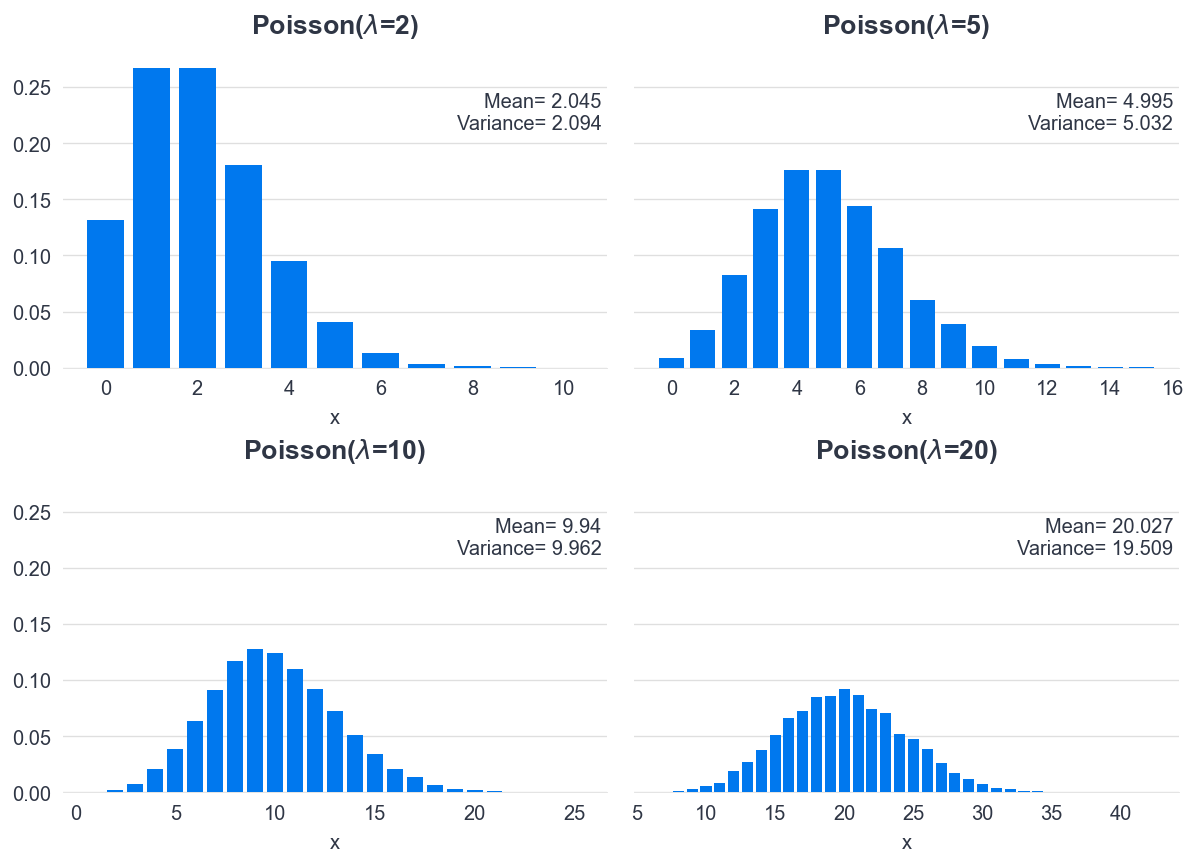

In [18]:
fig, axes = plt.subplots(
    2, 2, figsize=(12, 8), sharey=True, gridspec_kw={"wspace": 0.05, "hspace": 0.35}
)
rng = np.random.default_rng(121195)
lambdas = [2, 5, 10, 20]

for lam, ax in zip(lambdas, axes.ravel()):
    draws = rng.poisson(lam, size=10000)
    values, counts = np.unique(draws, return_counts=True)    
    annotation = f"Mean= {round(draws.mean(), 3)}\nVariance= {round(draws.var(), 3)}"
    ax.text(0.99, 0.875, annotation, ha="right", va="top", transform=ax.transAxes)
    ax.bar(values, counts / counts.sum())
    ax.set(xlabel="x", title=f"Poisson($\lambda$={lam})")

Here we have values from four example Poisson distributions. They are sorted from smallest to largest lambda. As lambda increases, both the mean and the variance increase. No surprises given what we said before.

In the visualization we see this phenomena both in the range and the scale of the horizontal axis, and more evidently in the annotation that indicates both the sample mean and variance.

In practical terms, if the mean goes up, so does the variance. If the mean goes down, you got it, so does the variance. They're far from being independent -- they're exactly equal! There's no escape!

<!-- How flexible is a distribution that sets the mean equal to the variance? Not much, right? -->

## Why is this simplicity a problem once again?

In [19]:
df_toy_count = pd.read_csv("data/toy_counts.csv")
print(df_toy_count.shape)
print(df_toy_count["values"].to_numpy()[:10])

(500, 1)
[ 3  4  9  1  7  5  7 13  2  9]


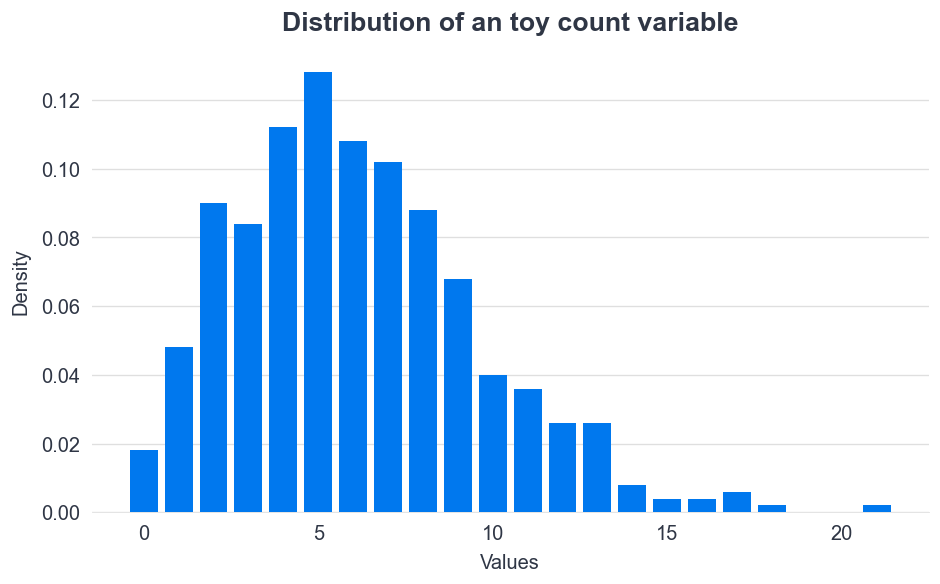

In [20]:
fig, ax = plt.subplots(figsize=FIGSIZE)
values, counts = np.unique(df_toy_count["values"], return_counts=True)    
ax.bar(values, counts / counts.sum())
ax.set(xlabel="Values", ylabel="Density", title="Distribution of an toy count variable");

Here we can visualize the distribution of some count data we won't reveal where it comes from, but it will be very useful to understand the problem. 

We can see the observed values range from 0 to 21 and most of them are around 5. It's possible to guess the mean will be something slightly above 5 because of the right tail.

Let's fit a Poisson distribution to this data and see how well it does.

## Why is this simplicity a problem?

In [21]:
np.mean(df_toy_count["values"])

6.108

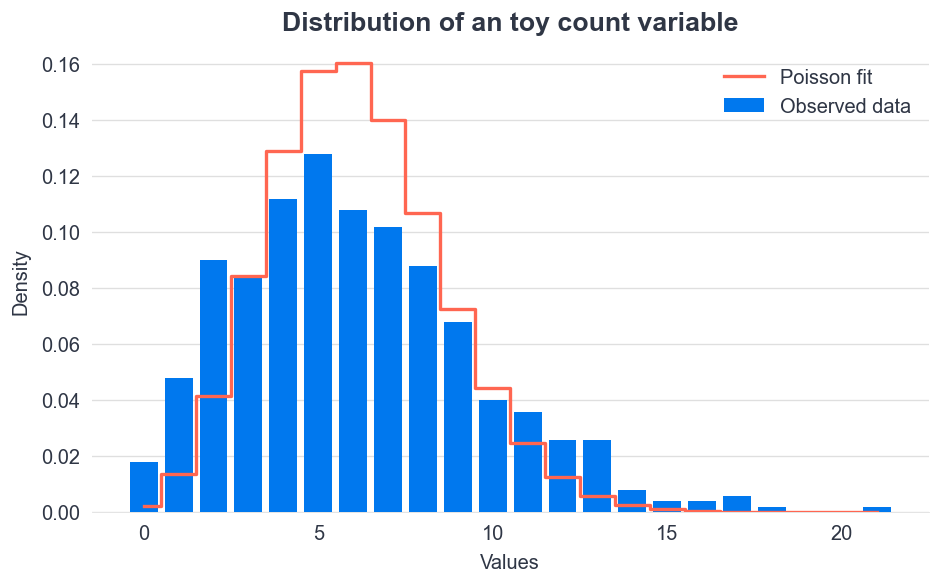

In [22]:
poisson_mu = 6.108
poisson_pmf = stats.poisson(mu=poisson_mu).pmf(values)

fig, ax = plt.subplots(figsize=FIGSIZE)
values, counts = np.unique(df_toy_count["values"], return_counts=True)    
ax.bar(values, counts / counts.sum(), label="Observed data")
ax.step(values, poisson_pmf, color="C4", where="mid", linewidth=2, label="Poisson fit")
ax.set(
    xlabel="Values", 
    ylabel="Density", 
    title="Distribution of an toy count variable",
    ylim=(0, 0.165), 
)
ax.legend();

**Quick homework!** Compute the variance of the observed data. Is it larger or smaller than the mean? Think about how it relates to the goodness of fit of the Poisson distribution.

Fitting a Poisson distribution is simply finding an estimate of $\lambda$, and the empirical mean is a reasonable choice for this exercise.

The location of the bulk of the distribution is very well captured by the Poisson distribution. It's doing a great job there. But see how the distributions differ in terms of dispersion. The Poisson distribution puts much more probability around central values (i.e. between 4 and 8), while the observed data puts more probability on the tails. This affects the probabilities we compute. The Poisson model will overestimate the probability around the central values.

The Poisson distribution is like the minimalist of the distributions. It is appropriate in so many cases, but it's not always the right tool. Its simplicity does not allow it to reflect all the variability in the data in all cases, like this one.

### This is not the first time it bites us, my friend

<center>
  <img src="imgs/laplacian_lancets.jpeg" style="width:500px" class="w-50p"; />
</center>

In the last lesson we had this issue with the Laplacian Lannets. We wanted to be wanted to model their zero score rate, but with only one parameter in Poisson, we couldn't effectively model both the mean and the zero. 

### What's overdispersion

In [23]:
arrowstyles = {
    "color": "0.2", 
    "arrowstyle": "Simple, tail_width=0.3, head_width=4, head_length=4",
}

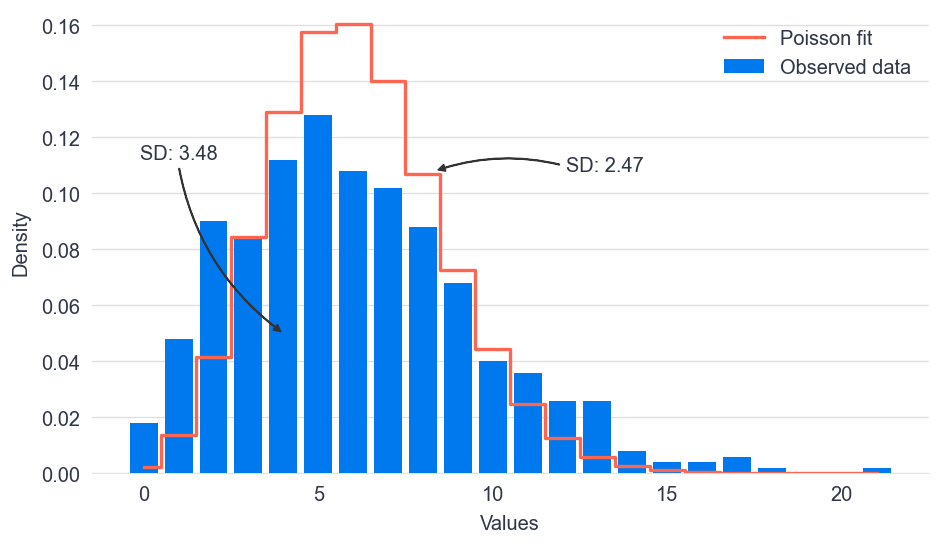

In [24]:
poisson_pmf = stats.poisson(mu=poisson_mu).pmf(values)
rvs = stats.poisson(mu=poisson_mu).rvs(10000)

sd_data = np.std(df_toy_count["values"])
sd_model = np.std(rvs)

fig, ax = plt.subplots(figsize=FIGSIZE)

values, counts = np.unique(df_toy_count["values"], return_counts=True)    
ax.bar(values, counts / counts.sum(), label="Observed data")
ax.step(values, poisson_pmf, color="C4", where="mid", linewidth=2, label="Poisson fit")
ax.set(xlabel="Values", ylabel="Density", ylim=(0, 0.165))

arrow = FancyArrowPatch(
    (12, 0.11), (8.35, 0.108),
    **arrowstyles,
    connectionstyle="arc3, rad=0.15",
    zorder=10
)
ax.add_patch(arrow)
ax.text(12 + 0.1, 0.11, f"SD: {round(sd_model, 2)}", va="center")

arrow = FancyArrowPatch(
    (1, 0.11), (4, 0.05),
    **arrowstyles,
    connectionstyle="arc3, rad=0.2",
    zorder=10
)
ax.text(1, 0.112, f"SD: {round(sd_data, 2)}", va="baseline", ha="center")
ax.add_patch(arrow)

ax.legend();

**Overdispersion**: The dispersion in the data is **larger** than the one implied by the model

We say there's an overdispersion problem when the variability in the data is systematically larger than the variability implied by the model. 

In the simple example where we overlapped a Poisson distribution on top of some count data, the Poisson distribution does not allocate enough probability in the tails. And something similar occurs with the lake dataset, the conditional posterior predictive distributions are too tight.

**Heads up!** A small difference between the observed variability and the one in the model does not necessarily mean there's an overdispersion problem. We don't always expect perfect matches. This is statistics, the best we can do is a good approximation. It's not that we love errors, but we get used to living with them.

## Overdispersion in our model

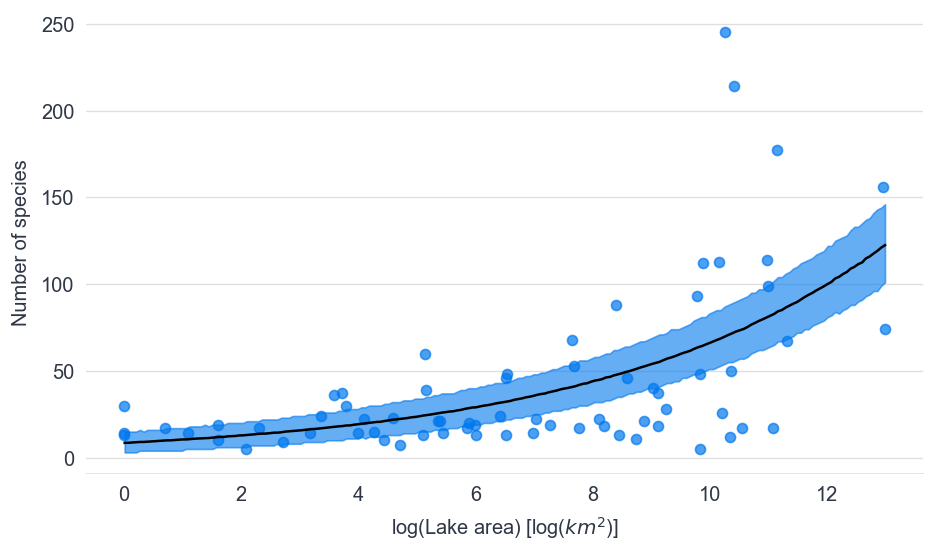

In [25]:
fig, ax = plt.subplots(figsize=FIGSIZE)
ax.scatter(np.log(data["lake_area"]), data["fish"], alpha=0.7)
ax.plot(x_values, line_mean, color="black")
ax.fill_between(x_values, line_bounds[0], line_bounds[1], color="C0", alpha=0.6)
ax.set(xlabel="log(Lake area) [log($km^2$)]", ylabel="Number of species");

Here we have again the visualization of the lake data together with the conditional posterior predictive distribution. See there are many points that escape the band (and some by a lot). This is a typical pattern when there's overdispersion. I'm happy we could find such a clear example.

You may be saying "Cool! Nice to give it a name, but a name doesn't give me the solution". And you're right! That's what's coming right after the following section recap.

## Section Recap

* **Overdispersion**: The variability in the data is larger than the variability admitted by the model
* Poisson is great, but restrictive
    * Simplicity comes at a cost
    * We implicitly assume the variance is equal to the mean
    * A great candidate for overdispersion problems

# When the whole is more than the sum of the parts

Alternative title "When the whole is more than the sum"

We, humans, have been combining some things to create a better something for so many years. There are many situations in life when the whole is more than the sum of the parts. 

## A culinary experience

<center>
  <img src="imgs/culinary.jpg" style="width:600px" class="w-70p"; />
</center>

One of the scenarios where us humans love to mix things up all the time is in the kitchen. Take, for instance, some good vegetables and a little bit of oil -- bam, you've got yourself a tasty salad. And this whole idea works with ingredients of all levels of complexity. Going back to the basics, just a touch of flour, water, and salt are all it takes to craft a fantastic loaf of bread. The possible combinations are practically endless and absolutely delicious.

## Some combinations are very special 

<center>
  <img src="imgs/fernet.png" style="width:850px"; class="w-80p"/>
</center>

When Ravin came to Argentina, I invited him to try a drink that's super popular among us – fernet. Fernet is an alcoholic beverage from the family of Italian amaros, made by macerating various types of herbs in alcohol.

Some folks take it straight after a meal. According to them, fernet aids in digestion. My personal tip is, if you're going to try it this way, take just a tiny sip. I'm predicting the same reaction as Ravin had: it's going to seem pretty awful.

However, the most popular way to enjoy this drink in Argentina is mixed with Coca-Cola. Many, myself included, say the perfect ratio is 30% fernet, 70% Coca-Cola, and loads of ice. I love it, so tasty and so Argentine.

Just to wrap up the culinary section, and because you may be wondering what's the link between this and the lesson, I'd like to mention that I know many people who won't touch either Coca-Cola or fernet individually. Yet, they adore fernet with coke – the perfect combo. For an Argentine, without a doubt, here the whole is way more than the sum of its parts.

**Animation** First reveal image on the left, then the image on the right

## We can combine more than just food

* **Combine food** to make more delicious dishes

* **Combine distributions** to create more powerful probability distributions

Just like how we mix various ingredients to create better and innovative dishes, we can combine probability distributions to obtain more powerful and versatile distributions.

This straightforward yet clever notion is what will enable us to build more suitable statistical models when we encounter issues with overdispersion. Now, while the concept of combining distributions is simple, the question remains: How do we actually do it?

Let me just mention one small thing before we continue: get ready to encounter some integrals!

## Combining distributions

$$
\begin{aligned}
Y        &\sim \mathcal{D}_1(\theta_1) \\
\theta_1 &\sim \mathcal{D}_2(\theta_2)
\end{aligned}
$$

$$
h(y \mid \theta_2) = \int f(y \mid \theta_1) g(\theta_1 \mid \theta_2) d\theta_1
$$

* $f(y \mid \theta_1)$ is the density function of $\mathcal{D}_1$
* $g(\theta_1 \mid \theta_2) $ is the density function of $\mathcal{D}_2$
* $h(y \mid \theta_2)$ is the density function of the **compound distribution**

🤓 **Notes for the nerd** 🤓 Chances are that what we've just looked at might ring a bell from some more formal course in Bayesian statistics. This process of integrating the density function of $Y$ with respect to its parameters is **exactly the same** as what you do when you manually derive the posterior predictive distribution.

**Animation ideas**

* First reveal only the first line of the distributions. Reveal the second one when I say "what if..."
* Highlights
    * The integral when I say "we can marginalize over the parameters of the first distribution..."
    * Highlight all the theta_1 with one color, and the theta_2 with other color
    * Add a rectangle around the integrand and add text saying "joint distribution"
* When I say "the result is another probability distribution..." reveal the left hand side of the equation and highlight it with another color, perhaps add text saying "compound distribution".

Let's say we have have a random variable $Y$ that follows a certain distribution $\mathcal{D}_1$ that depends on parameter $\theta_1$. The parameter $\theta_1$ is usually a fixed value, a constant. It could be any of the distributions you're familiar with. For example, if the distribution is Exponential(5), then $\mathcal{D}_1$ is Exponential and $\theta_1$ is 5. So far so good, nothing special here. 

What if $\theta_1$ is a random variable instead of a constant? In that case, both $Y$ and $\theta_1$ are random variables and as such they have a joint probability distribution. For sure, we are facing a more complex mathematical structure. The upside is this complexity allows us to do more interesting things. 

For example, we can marginalize over the parameters of the first distribution $\mathcal{D}_1$. To do this, we need to integrate the joint distribution of $Y$ and $\theta_1$ over $\theta_1$, the parameter of $\mathcal{D}_1$. The result is another probability distribution that we call the **compound distribution** and only depends on the parameters of $\mathcal{D}_2$.

## Compounding is **hard**

* To compound is to integrate

* Integration is hard

* Fortunately, others have already solved the integrals we need

* The outcome is a new probability distribution, the **compound distribution**

Okay, let's take it down a notch. What we just saw is really complex. Let's analyze what it means. 

When we say we compound probability distributions we mean we need to compute integrals. And everybody knows integration can be extremely hard sometimes. It becomes intimidating.

However, we mentioned it so we get the full picture. We're not solving integrals here. That's great news, thanks to others who already solved the integrals we need. 

What we need to know for sure is that after we compound probability distributions, we get a new one as a result.

## Fixing Poisson

$$
\begin{aligned}
Y \mid \lambda &\sim \text{Poisson}(\lambda) \\
\lambda &\sim \text{Gamma}\left(\mu, \alpha\right)
\end{aligned}
$$

* $\mu$ is the mean of the Gamma distribution
* $\alpha$ is the shape parameter of the Gamma distribution

I want to tell you something: **the Poisson distribution is part of the solution**. It's great for counts and we do have a count variable. Somehow, we need to get an improved version of it.  

What about using what we just learned? Could we think of $\lambda$ as a random quantity that follows some distribution and then we marginalize over it to get a new distribution? Yes, that's the plan! Doesn't it sound complicated? Yes as well 😅

Let's use a Gamma distribution with mean $\mu$ and shape $\alpha$ for $\lambda$. It is appropriate for the problem at hand because $\lambda$ must be positive and it's exactly what the Gamma gives us.

## Gamma-Poisson compound

$$
\begin{aligned}
Y \mid \lambda &\sim \text{Poisson}(\lambda) \\
\lambda &\sim \text{Gamma}\left(\mu, \alpha\right)
\end{aligned}
$$

when we marginalize over $\lambda$...

$$
\begin{aligned}
p(y \mid \mu, \alpha) &= \int_0^{\infty}{p(y \mid \lambda) p(\lambda \mid \mu, \alpha) d\lambda} \\
&= \binom{y + \alpha - 1}{y}{\left(\frac{\alpha}{\mu + \alpha}\right)}^\alpha {\left(\frac{\mu}{\mu + \alpha}\right)}^y
\end{aligned}
$$

Finally...

$$
Y \sim \text{GammaPoisson}(\mu, \alpha)
$$


We need to marginalize out $\lambda$. Is it easy? Of course it's not! Nobody said it was easy. Integrals are never easy. But we don't have to do the math. Other people already did it for us. We can just write out the expression of the integral and the end result to make it look like we're so clever. 

The important thing is that the marginalization or compound leads to a new probability distribution that will be very very helpful.

The convoluted mathematical expression on the right hand side of $p(y \mid \mu, \alpha)$ is the equation of a probability mass function. Because it's the child of a Poisson distribution whose parameter follows a Gamma distribution, we call it the **Gamma-Poisson distribution**, and it has two parameters, those from the Gamma, $\mu$ and $\alpha$.

## Why it's helpful

<center>
  <img src="imgs/poisson_gamma_poisson_drake.png" style="width:500px"; class="w-50p"/>
</center>

There's nothing special in the Gamma-Poisson distribution, albeit it's been complicated to understand the intricate details that led us to it. It's **just another probability distribution**. We can argue it's suitable to model integer outcomes, like counts.

Don't we already have a distribution that works with count outcomes, the Poisson? Yes, that's right! So why do we need a new one? Remember, the Poisson distribution can be quite restrictive because it assumes the mean is equal to the variance. And that's not always the case.

So what makes the Gamma-Poisson distribution really helpful for us is not that it is suitable for counts. What makes it special is **it allows the variance to be larger than the mean** due to the contribution of the extra term $\phi \mu^2$. This is exactly what we need!

Notice we defined a new parameter $\phi$ which is the reciprocal of the $\alpha$ parameter!

Since the variance is larger than the mean when $\phi > 0$, it's convenient to call $\phi$ the overdispersion parameter.

## Popular by a different name

<center>
  <img src="imgs/names_1.png" style="width:1000px"; class="w-85p"/>
</center>

Before leaving, there's one last thing I would like to cover. And hopefully what you're seeing here is of help (I know, it's weird).

But do you know what do all of them have in common? They are all popular by different names. 

It is quite a common phenomena in humans. We all use a name to call something or someone when there's another real name (and sometimes it's more appropriate). This happens with people, objects, and also with statistical creatures!

**Curious?** 🤓

|         **Name**        |  **Mostly known as**  |
|:-----------------------:|:---------------------:|
| Reginald Kenneth Dwight |       Elton John      |
|       Sticky notes      |        Post-it        |
|    **Gamma-Poisson**    | **Negative Binomial** |
|   Demetria Gene Guynes  |       Demi Moore      |
|      Facial tissue      |        Kleenex        |

## The Negative Binomial distribution

$$
Y \sim \text{GammaPoisson}(\mu, \alpha)
$$

$$
Y \sim \text{NegativeBinomial}(\mu, \alpha)
$$

it's actually popular under a different parametrization...  

$$
Y \sim \text{NegativeBinomial}(p, n)
$$

$$
\begin{aligned}
p &= \frac{\alpha}{\mu + \alpha} \\
n &= \alpha
\end{aligned}
$$

$$
p(y \mid n, p)= \binom{y + n - 1}{y}p^n (1 - p)^y
$$

We call this distribution the Gamma-Poisson distribution because it arises from compounding a Poisson with a Gamma. I would say it's even the most natural name we can give it.

However, it's not widely known by that name. 

While "Gamma-Poisson" is a very informative name, it's not the name for which most people know it. Like Kleenex or Post-it. Those are not the real names of things, those are brands of facial tissue and sticky notes.

## Section Recap

* We can combine probability distributions, just like ingredients
    * The result is a more flexible distribution
    * It comes with extra responsibility
* We found the Gamma-Poisson distribution (aka Negative-Binomial)
    * Works with counts, just like the Poisson
    * Allows variance to be larger than the mean
* We're going to try it in the next section!

Just like we combine ingredients to make better meals, we can combine distributions. The result is not a "bigger" distribution, and perhaps it doesn't necessarily imply a superior alternative, but certainly it leads to a more flexible distribution.

# Negative Binomial regression

## Why Negative Binomial

* We have the Negative Binomial distribution

* It allows the variation to be larger than the mean

* Is it what we need to solve our problem?

We found a new distribution in the previous section, the Negative Binomial. What's cool about it is that it's useful to model count responses, like the Poisson distribution. Still, unlike the Poisson distribution, it allows the variance to be larger than the mean.

It sounds like the solution we need to appropriately account for the extra variation when modeling the number of fish species as a function of the lake size. But so far, it's just a guess. Let's test this solution!

## Negative Binomial in action -- the math

$$
\begin{aligned}
\beta_0 &\sim \text{Normal}(3.3, 1) \\
\beta_1 &\sim \text{Normal}(0, 1) \\
\alpha &\sim \text{InverseGamma}(4, 2) \\
\eta_i  &= \beta_0 + \beta_1 \log(\text{area}_i) \\
\mu_i   &= \exp(\eta_i) \\
\text{fish}_i &\sim \text{NegativeBinomial}(\mu_i, \alpha)
\end{aligned}
$$

The structure of the linear predictor is the same. We still have an intercept plus a slope multiplying the logarithm of the lake area. But this time we also need to consider the $\alpha$ parameter in the negative binomial distribution, which controls the amount of extra variation that the negative binomial distribution has compared to the Poisson. We put an inverse gamma prior on it, which means the overdispersion parameter has a gamma prior with the same shape and rate.

## Negative Binomial in action -- the code

In [26]:
priors = {
    "Intercept": bmb.Prior("Normal", mu=3.3, sigma=1), 
    "log(lake_area)": bmb.Prior("Normal", mu=0, sigma=1),
    "alpha": bmb.Prior("InverseGamma", alpha=4, beta=2)
}
model = bmb.Model("fish ~ 1 + log(lake_area)", data, priors=priors, family="negativebinomial")
idata = model.fit(chains=4, random_seed=121195)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [fish_alpha, Intercept, log(lake_area)]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 5 seconds.


It's quite easy to translate all of this into Bambi. And at this point, you did it so many times. Just make sure you change the name of the `family`, we use `"negativebinomial"` now. 

Finally, sample from the posterior, and we're done!

## Check traces

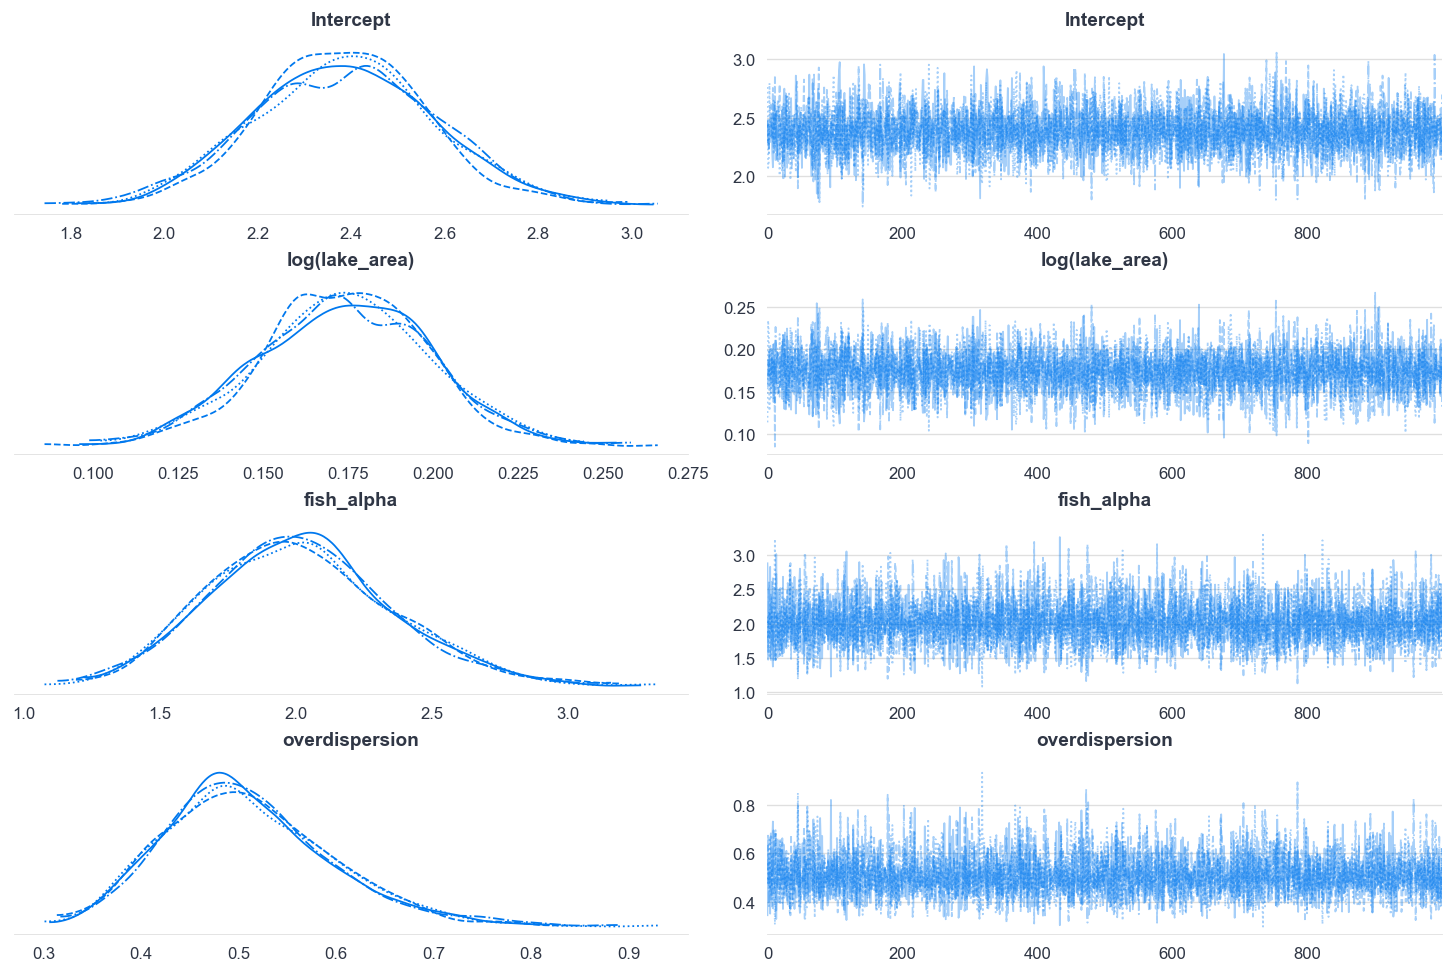

In [27]:
idata.posterior["overdispersion"] = 1 / idata.posterior["fish_alpha"]
az.plot_trace(idata, backend_kwargs={"layout": "constrained"});

Well, no, we're not that done. There's still some work to do. 

For example, we can check the traceplots. There's an important piece of information here that we were not considering before with the Poisson model -- the overdispersion parameter. We have to compute it as the reciprocal of $\alpha$. Very easy! 

Unsurprisingly, there are no surprises here. The traces look very fuzzy and the density estimations are all very similar for all the model parameters. That's great.

See the marginal posterior of the overdispersion parameter. All the probability mass is between 0.3 and 0.7. Remember, the closer $\phi$ is to zero, the closer the variance of the negative binomial distribution is to the one of the Poisson distribution. In the posterior we see the overdispersion definitely is not zero. The extra variability is between 30% and 70% of the squared mean. This is a huge insight!

## Posterior predictive checks

In [28]:
model.predict(idata, kind="pps")

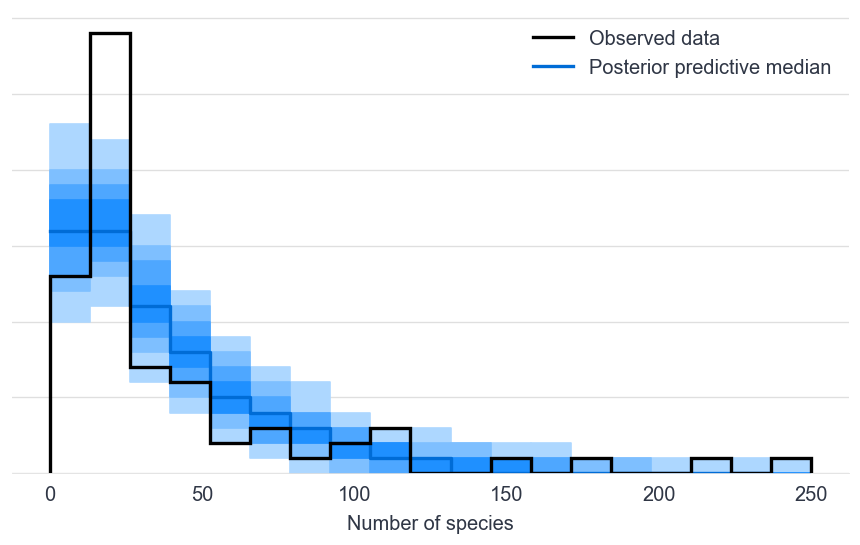

In [29]:
bins = np.linspace(0, 250, num=20)
fig, ax = plt.subplots(figsize=FIGSIZE)
plot_ppc_discrete(idata, bins, ax)
ax.set(xlabel="Number of species", yticklabels=[]);

Previously, we used the posterior predictive checks to assess how well the model reproduces the marginal distribution of the number of species. The model predictions and the observed distribution were quite off. Let's see what we get with our new model.

That looks better, doesn't it? The black line is almost always contained within the credible bands, something that didn't happen with the Poisson regression model. However, it's not all roses, you know. The model still seems to underestimate the probability when the number of species is around 25.

Enough for now, let's check the conditional distribution of species counts, which is the chart that revealed all this overdispersion drama.

## Conditional distribution of species counts

In [30]:
new_lake_area = np.exp(np.linspace(0.01, np.max(np.log(data["lake_area"])), num=200))
new_data = pd.DataFrame({"lake_area": new_lake_area})
model.predict(idata, kind="pps", data=new_data)

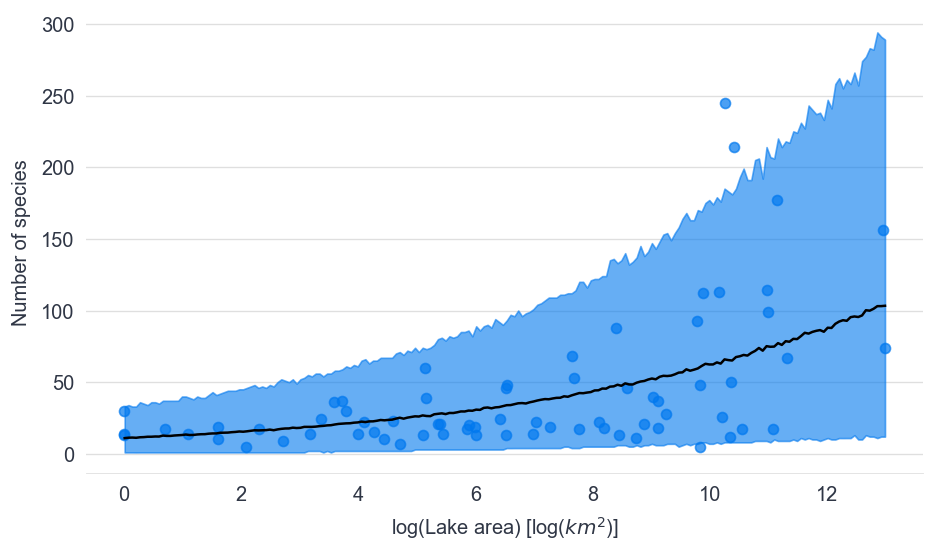

In [31]:
line_mean = idata.posterior_predictive["fish"].mean(("chain", "draw")).to_numpy()
line_bounds = (
    idata.posterior_predictive["fish"].quantile((0.025, 0.975), ("chain", "draw")).to_numpy()
)

fig, ax = plt.subplots(figsize=FIGSIZE)
ax.scatter(np.log(data["lake_area"]), data["fish"], alpha=0.7)

ax.plot(np.log(new_data["lake_area"]), line_mean, color="black")
ax.fill_between(np.log(new_data["lake_area"]), line_bounds[0], line_bounds[1], color="C0", alpha=0.6)
ax.set(xlabel="log(Lake area) [log($km^2$)]", ylabel="Number of species");

This is awesome! Do you notice the change? See how the data points are (almost) always contained within the bands. The conditional posterior predictive distribution is now faithfully representing the actual variability in the data. Just what we needed! 

Imagine we use this model to make predictions for new lakes. The mean of the predictions will be similar to those that we get with the Poisson regression model, but the variability will be larger. It's so interesting, isn't it?

But hold on, it's not that more uncertainty is always a good thing. This variability is genuinely present in the data. Having a model that doesn't account for it can give us a false sense of security, and we definitely don't want that.

## Section Recap

* We created a new model using the negative binomial distribution
    * Easy with Bambi
    * Give it a try with PyMC!
* The variance is allowed to be larger than the mean
    * The data support this
* Predictions are a bit more uncertain
    * They reflect reality better 

We've developed a new model using the negative binomial distribution. It's super easy with Bambi and it won't be hard with PyMC, so feel free to give it a try! The reason why used this model is because it allows the variance to be larger than the mean. Indeed, we found the data data supports this. The posterior of the overdispersion parameter has most of the probability far away from zero.

As a result, the predictions might be a bit more uncertain, but they better reflect the reality of the underlying data. It's a small trade-off for gaining more reliable estimations. 

In the posterior predictive checks we found the model does not provide a perfect fit. After all, it's still a simple model. There are many factors that determine the number of species in a lake, and we're only considering its size.

# Overdispersion for all

## Like a contagious disease

<center>
  <img src="imgs/its_everywhere.png" style="width:600px"; class="w-70p" />
</center>

You know, overdispersion doesn't only appear when using a Poisson distribution to model some unbounded count... It can appear everywhere we have a count response variable. 

If that's not challenging enough, there's more: it's not always easy to detect it. The good part is there's a lot written out there about overdispersion. The bad is that it's kind of very well dispersed among different books, papers, and other resources. 

This was a big part of what motivated us to work on a complete lesson about overdispersion, how it can appear in many cases, how to detect it, and more importantly, how to deal with it.

It's not easy. But there's a big reward at the end.

## Bounded counts

* We covered bounded counts in Lessons 4, and 6
    * Example: The number of customers that convert out of a sample of 50 customers

* $Y$ number of successes in $n$ trials 
    * Binomial distribution

* We'll start simple

We have already worked with different kind of count outcomes. In Lesson 7 we covered Poisson regression for count variables. But previously, we also covered bounded counts. Like when you model the number of customers that convert out of a sample of 50 customers, for example. That's also a count. The response variable $Y$ records the counts. 

When we have a response variable $Y$ that represents the number of successes out of $n$ trials we usually use the Binomial distribution. 

We'll get started with a simple example from the second edition of Statistical Rethinking by Richard McElreath. This will serve as the basis to understand how to detect overdispersion in a simple to visualize scenario. After that, we'll jump right onto a much more challenging scenario where overdispersion is not that evident. 

📝 **Technical notes** 📝

A random variable $Y$ follows a Binomial distribution when following occur

* There are $n$ independent _Bernoulli trials_ with the same probability of success $\pi$
    * A Bernoulli trial is an experiment that has two possible outcomes (success and failure, usually represented with 1 and 0).
    * Example: Flipping a coin and considering Heads as success. Then, the coin flip is the experiment, heads is a success and tail is a failure.
* $Y$ records the number of cases where the trial result was a success
* Then, $Y$ follows a Binomial distribution with parameters $n$ and $\pi$

Mathematically,

$$
\begin{aligned}
X_1, X_2, \cdots, X_n &\underset{iid}{\sim} \text{Bernoulli}(\pi) \\
\sum_{i=1}^{n}{X_i} = Y &\sim \text{Binomial}(n, \pi)
\end{aligned}
$$

## Graduate admissions

In [32]:
df_admissions = pd.read_csv("data/UCBadmit.csv")
df_admissions

,dept,gender,admit,reject,applications
1,A,male,512,313,825
2,A,female,89,19,108
3,B,male,353,207,560
4,B,female,17,8,25
5,C,male,120,205,325
6,C,female,202,391,593
7,D,male,138,279,417
8,D,female,131,244,375
9,E,male,53,138,191
10,E,female,94,299,393


The data comes from a 1975 paper called _Sex Bias in Graduate Admissions: Data From Berkeley_. The version we are using here is the one available on Richard McElreath's excellent book Statistical Rethinking. 

It is a fairly small dataset. There are only 12 records. The variables are department (`dept`), gender (`gender`), and the number of students that were admitted (`admit`), rejected (`rejected`) and the total number of applications (`applications`).

You'll see that small and simple datasets have a lot to teach us.

## Data exploration

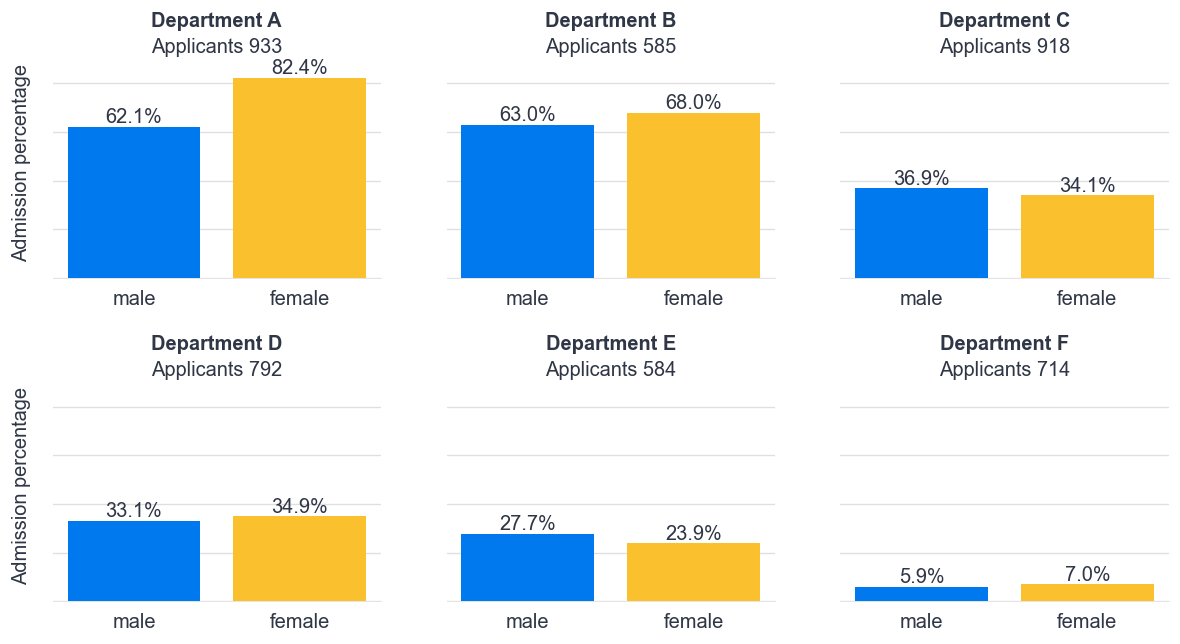

In [33]:
fig, axes = plt.subplots(2, 3, figsize=(12, 6), sharey=True, gridspec_kw={"hspace": 0.4})

for ax, (dept, df_dept) in zip(axes.ravel(), df_admissions.groupby("dept")):
    p_observed = (df_dept["admit"] / df_dept["applications"]).to_numpy()
    ax.bar(["male", "female"], p_observed, color=["C0", "C1"])
    for i, p_obs in enumerate(p_observed):
        ax.text(i, p_obs + 0.015, f"{round(100 * p_obs, 1)}%", ha="center", va="baseline")
    ax.set_title(f"Department {dept}", size=12)
    ax.text(
        0.5, 0.975, f"Applicants {df_dept['applications'].sum()}", 
        ha="center", va="baseline", transform=ax.transAxes
    )

axes[0, 0].set(yticklabels=[], ylim=(0, 0.95), ylabel="Admission percentage");
axes[1, 0].set(ylabel="Admission percentage");

Let's have a look at the data. To do that, you know, we create a nice-looking visualization.

When it comes to admissions, different departments seem to have varying acceptance rates. For instance, Department A shows a 62.1% acceptance rate for males and 82.4% for females, while Department F has a below 10% acceptance rate for both genders. The other departments fall somewhere in between.

What we're interested in is the association between gender and the probability of being accepted. So let's have a look at it.

In four out of six departments (A, B, D, and F), females actually have higher admission percentages than males. Plus, interestingly, there doesn't seem to be any association between the number of applicants and the acceptance probability or gender. 

## Binomial model for graduate admissions

$$
\begin{aligned}
\beta_{\text{gender}[i]} &\sim \text{Normal}(0, 2) \\
\text{logit}(\pi_i) &= \beta_{\text{gender}[i]} \\
\text{Admissions}_i & \sim \text{Binomial}(\pi_i, n_i) \\
\end{aligned}
$$

In [34]:
priors = {"gender": bmb.Prior("Normal", mu=0, sigma=2)}
model_admissions = bmb.Model(
    "p(admit, applications) ~ 0 + gender", 
    df_admissions, 
    family="binomial", 
    priors=priors
)
idata_admissions = model_admissions.fit(chains=4, random_seed=121195)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [gender]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.


Let's pretend we suffered some kind of amnesia and we know nothing about how important department can be to explain the admission rate. 

Since we are only interested in the association between gender and admission rate, we use gender as the single predictor in the model. Fearlessly, nothing can possibly go wrong.

To build a logistic regression model we use a binomial family and write the response as `p(y, n)`. Just as we covered in Lesson 4. 

Then, as usual in a Bambi modeler's life: dot fit.

## How does it fit?

In [35]:
model_admissions.predict(idata_admissions, kind="pps")

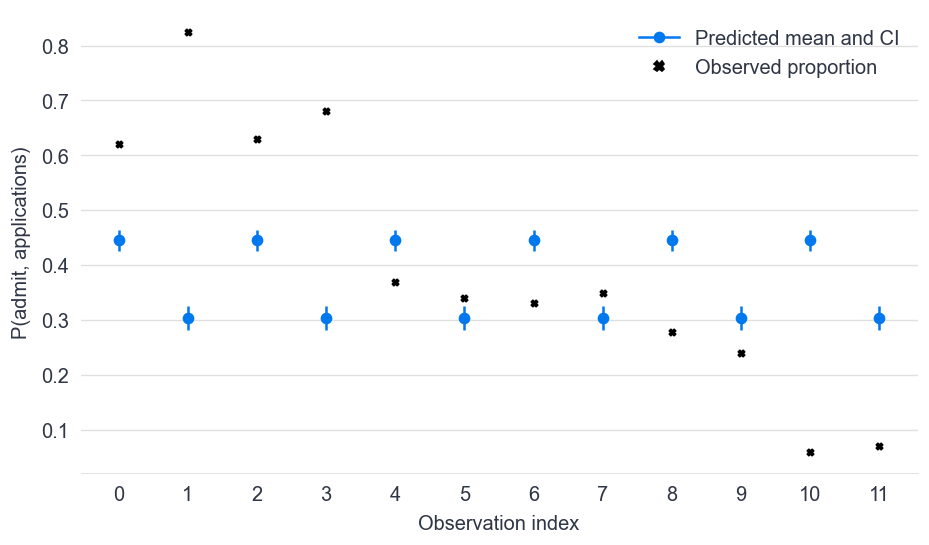

In [36]:
fig, ax = plt.subplots(figsize=FIGSIZE)

p_mean = (
    idata_admissions
    .posterior["p(admit, applications)_mean"]
    .mean(("chain", "draw"))
    .to_numpy()
)
p_qts = (
    idata_admissions
    .posterior["p(admit, applications)_mean"]
    .quantile((0.025, 0.975), ("chain", "draw"))
    .to_numpy()
)
p_observed = df_admissions["admit"] / df_admissions["applications"]

locs = np.arange(12)
ax.scatter(locs, p_mean, label="A")
ax.vlines(locs, p_qts[0], p_qts[1], zorder=1, label="A")
ax.scatter(locs, p_observed, marker="X", color="black", s=15, zorder=2)

ax.set(xlabel="Observation index", ylabel="P(admit, applications)", xticks=np.arange(12))

handles = [
    Line2D([], [], color="C0", marker="o", label="Predicted mean and CI"),
    Line2D([], [], color="black", lw=0, marker="X", label="Observed proportion")
]
ax.legend(handles=handles);

**Quick quiz!** It looks like the model is only capable of generating two different distributions, and we have 12 distinct observations. Why is that? Think about the number of parameters in the model.

We jump right straight from the model fit to a customized visualization to check how well the model fits. You can double-check R-hats or the traceplots to verify the convergence of our Markov chains. Spoilers: it's all good. 

In blue we have the posterior summaries. The dots show the posterior mean of the admission probability, and the vertical lines indicate the limits of a 95% credible interval, which are quite narrow. The model is so confident about what it infers!

On the other hand, black markers indicate the _empirical admission probability_. Just a fancy expression for the number of admissions over the number of applications. They are in line with what we saw in the previous barplots, of course. The insight here is the predicted probabilities _may_ be acceptable for some cases, but they are way off in others (e.g. have a look at the first or the last observations)

## Is there a gender effect?

In [37]:
idata_admissions.posterior["pi"] = expit(idata_admissions.posterior["gender"])

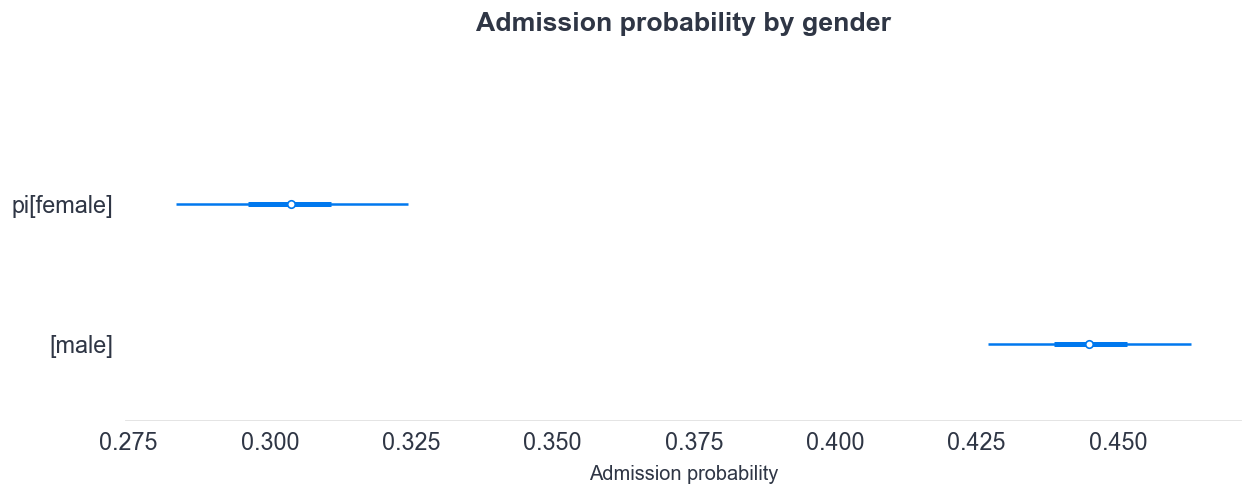

In [38]:
fig, ax = plt.subplots(figsize=(12, 4))
az.plot_forest(idata_admissions, var_names="pi", combined=True, ax=ax)
ax.set(xlabel="Admission probability", title="Admission probability by gender");

Remember what was the original goal, to study the association between gender and admission probability. Now we have the regression coefficient for each gender. These can tell us which gender is more likely to be admitted, according to the model. The problem is they are on the reals, not on the probability scale, so it's harder to interpret.

In order to get the probability of admission for each gender we need to use the inverse of the logit transformation. Do you remember its name from the logistic regression lesson? Yes, you do! It's the expit function, which is available in SciPy. We store the results in a new variable called `pi` in the InferenceData object.

With a forest plot we can compare the posterior admission probabilities for males and females. For males, the posterior probability is roughly between 0.42 and 0.46. For females, it is roughly between 0.28 and 0.33. Clearly, males have a significantly larger probability of being admitted than females.

## Check for overdispersion

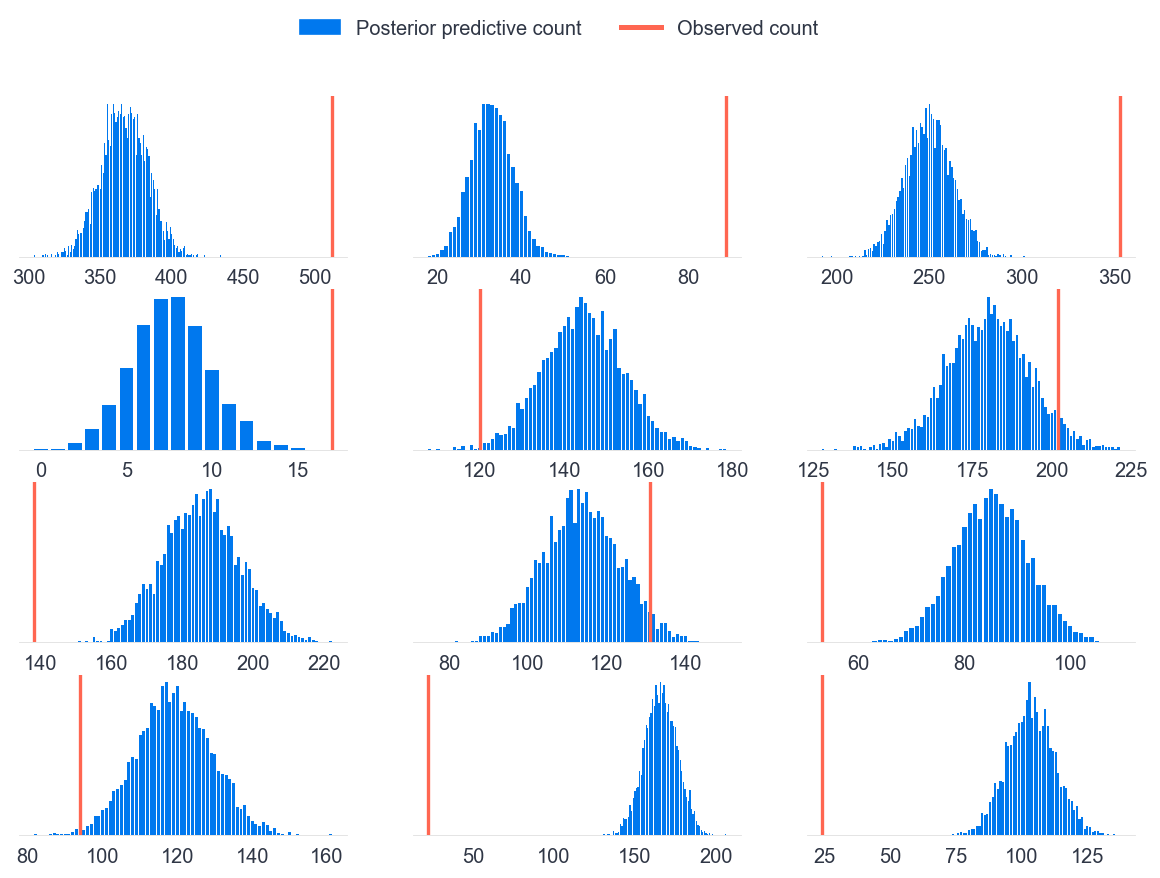

In [39]:
fig, axes = plt.subplots(4, 3, figsize=(12, 8))

for i, ax in enumerate(axes.ravel()):
    draws = (
        idata_admissions
        .posterior_predictive["p(admit, applications)"].sel({"p(admit, applications)_obs": i})
        .to_numpy()
        .flatten()
    )
    x, counts = np.unique(draws, return_counts=True)
    ax.bar(x, counts / counts.sum());
    ax.axvline(df_admissions.iloc[i]["admit"], color="C4", lw=2)
    ax.set_yticks([])

handles = [
    Patch(color="C0", label="Posterior predictive count"),
    Line2D([], [], color="C4", lw=3, label="Observed count")
]
legend = fig.legend(
    handles=handles,
    bbox_to_anchor=[0.5, 0.95],
    fontsize=12,
    loc="center", 
    ncol=2,
    frameon=False
)

**A note for the curious**: Are you still thinking about the bars in the previous chart? Why do they have different widths you may be wondering. The answer is they all have the same width: one. 

Since counts are discrete, it's more appropriate to use a barplot rather than a histogram. That's precisely what we've done here. In a barplot, each potential count is represented by a bar, with its height denoting the probability of that specific count. Unlike histograms, these bars are not connected, allowing us to observe the gaps between them. This is because there's no possible value between consecutive counts. For example, there's no possible value between 10 and 11 in a count variable.

So, going back to the original point. When the number of plausible counts is larger, there are more bars. However, the dimensions of the figure remain constant. Consequently, the bars might appear more crowded.

This is a lesson about overdispersion and the model fit is not that good. It's not hard to realize that now, somehow, we need to check for overdispersion. 

Previously, we plotted the credible bands of the conditional posterior predictive distribution on top of a scatterplot of the lake area versus the number of fish species. Unfortunately, we can't do exactly the same thing here because the predictor, gender, is not numeric. Don't worry, we can still do something.

There are 12 observations. We can get the posterior predictive distribution for each one and overlay the observed number of students admitted. We expect the observed value to fall within the posterior predictive distribution when the model fits well.

As you can imagine, that's not the case here. The observed number of students admitted always falls in the tails or very far away from the bulk of the posterior predictive distribution. What's more, sometimes it falls to the left, and sometimes to the right. This is exactly the pattern we expect to see when there's overdispersion (or the model is underdispersed). The variability in the posterior predictive distribution is just so small. 

Alright, we found the problem: overdispersion, again. Now we need to fix it. Let's see how to do it after the section recap.

## Section Recap

* According to the model inference, males are more likely to be admitted than females
* Overdispersion also appears in binomial settings
* It's important to understand what oversdispersion means
* Models are not overdispersed
    * The data has more variability than what the model can account for
* One certainty: we're not done

Overdispersion is not limited to unbounded count variables; it can also show up in binomial settings, when the count has an upper bound. 

To effectively detect it under various circumstances, we need to really understand it. When we encounter overdispersion, it means that our models aren't overdispersed themselves – it's just that the data has more variability than what our the model can account for. 

We can't blame the data when there's overdispersion; it's simply a symptom of the incompatibility between the data and the model we selected. However, there is one thing for certain: we need to keep iterating to find a solution.

# Beta-Binomial to the rescue

## Same problem, same strategy

* To make the Poisson more flexible we compounded it with a Gamma

* Can we use a similar strategy for the Binomial distribution?

* What would that look like?

* What distribution can we use?

We used a Binomial distribution to model the number of accepted students at Berkeley and we found our model was suffering from overdispersion problems.  Given the success of this strategy with the Poisson distribution, a natural question arises: can we apply a similar approach to the Binomial distribution? And if we decide to do that, what distribution can we use?

## Getting to know it better

$$
Y \mid n, \pi \sim \text{Binomial}(n, \pi)
$$

$$
\begin{aligned}
\mathbb{E}(Y) &= n \pi \\
\mathbb{V}(Y) &= n \pi (1 - \pi)
\end{aligned}
$$

🤓 **Hey nerd!** 🤓

$$
p(y \mid n, \pi) = \binom{n}{y} \pi ^ y (1 - \pi) ^ {(n - y)}
$$

It's also possible you've also encountered the formula for its probability function. It may be intimidating the first time you look at it, but its made of pretty simple components:

* In how many ways can I get $y$ successes in $n$ trials?
* The probability associated with the $y$ successes
* The probability associated with the $n - y$ non-successes

That's it! 

Let's first have a closer look at the binomial distribution. 

 binomial distribution is quite a good one. It appears all the time in one's statistical journey. One of its advantages is that it's also pretty simple, so it's highly likely you've seen its main features in a basic statistics course.

It depends on two parameters, $n$ which is known as the number of trials and is usually fixed or given, and $\pi$ which is the probability of success. In the student admissions example, the success is to be admitted. So $\pi$ is the probability of admission.

Finally, we have two quantities that are of great interest to us: the mean and the variance. They're not too complicated and they involve both parameters. Let's make sense out of them. If $n$ is 50 and $\pi$ is 0.2, the mean is $50 \cdot 0.2 = 10$. It's not only easy, it also matches our intuition. If I observe 50 times something that has a probability of occurring of 0.2, I would expect to see it happening 10 times. 

A similar logic applies to the variance, but it also considers the probability of failures (i.e. when a success doesn't occur). The interesting part here is the mean is not independent of the variance since both depend on $n \cdot \pi$. It's not as extreme as the Poisson distribution where the variance is forced to match the mean, but it's similar in the sense that the mean and the variance are quite related to each other.

## How does the Binomial distribution look like

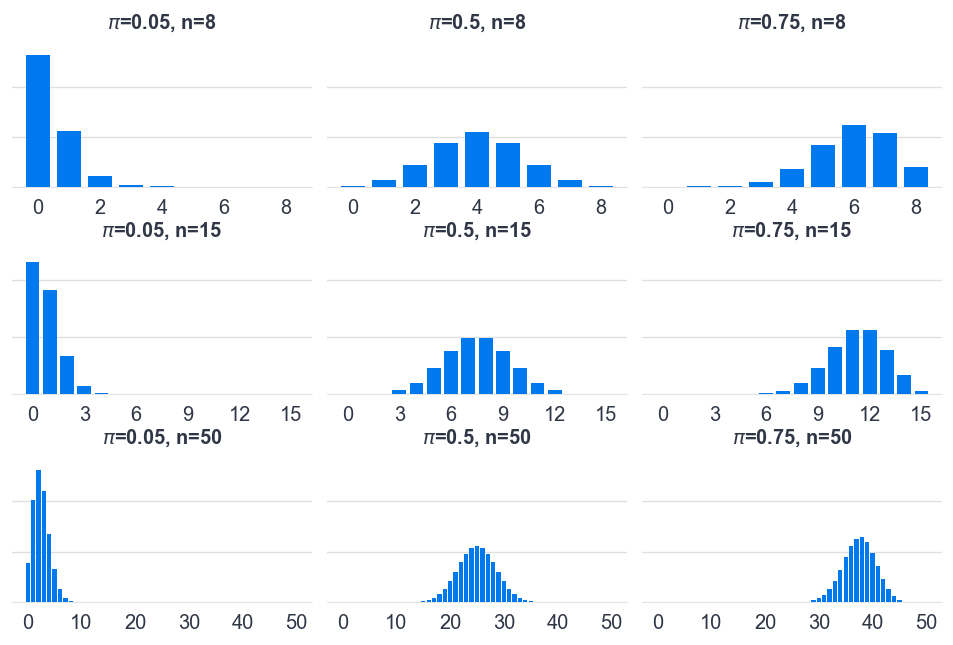

In [40]:
n_list = [8, 15, 50]
prob_list = [0.05, 0.5, 0.75]
steps = {8: 2, 15: 3, 50: 10}

fig, axes = plt.subplots(
    3, 3, figsize=(10, 6), gridspec_kw={"wspace": 0.05, "hspace": 0.5}, sharey="row"
)

for i, n in enumerate(n_list):
    for j, prob in enumerate(prob_list):
        xticks = np.arange(n + 1, step=steps[n])
        axes[i, j].bar(np.arange(n + 1), stats.binom(p=prob, n=n).pmf(np.arange(n + 1)))
        axes[i, j].set(yticklabels=[], xticks=xticks)
        axes[i, j].set_title(f"$\pi$={prob}, n={n}", size=12)

Let's put a short pause on the math for now and gain some insights using a nice-looking visualization.

Here we plot the probability mass function of the Binomial distribution for different success probabilities and sample sizes. The horizontal axis indicates the number of successes, or the value of the variable $y$. The height of the bars indicate the probability of the corresponding values.

As you can expect, as the success probability increases, the probability mass concentrates in larger values. Also, for a given value of $n$, the maximum variability is observed when $\pi=0.5$. 

For example, let's take $n=50$. The variance has an upper bound and it is $n \times \pi \times (1 - \pi) = 50 \times 0.5 \times 0.5 = 12.5$. Any other value of $\pi$ will result in a smaller variance.

To summarize, the shape of the distribution depends on both $\pi$ and $n$, and the maximum variance is obtained when $\pi = 0.5$. It's not as in the case of the Poisson distribution where the variance is constrained to be equal to the mean, but the Binomial distribution still imposes some constraints on the variance.

## Binomial on steroids

$$
\begin{aligned}
Y \mid n, \pi &\sim \text{Binomial}(n, \pi) \\
\pi &\sim \text{Beta}\left(\alpha, \beta\right)
\end{aligned}
$$

* $\alpha$ is a shape parameter
* $\beta$ is a shape parameter

As it happened previously with the Poisson distribution, the Binomial distribution is also part of the solution. We have a bounded count, and the binomial is great in those cases. We just need a more flexible version of it.

As we did before, we're going to consider the parameter of interest, $\pi$ in this case, to be a random variable with a certain distribution. Then, as you may already be imagining, we're going to marginalize out $\pi$.

Notice we have to pick a distribution from a limited set. The parameter $\pi$ lives in the $[0, 1]$ interval, so many of the distributions we know don't apply. But there's one distribution that's very flexible and satisfy the domain constraint we have. The one that you can already guess from the section title. Yes, that's it: the Beta distribution.

Let's integrate now! (Though I guess nobody can be too excited about hard math 😅)

## Beta-Binomial compound

$$
\begin{aligned}
Y \mid n, \pi &\sim \text{Binomial}(n, \pi) \\
\pi &\sim \text{Beta}\left(\alpha, \beta\right)
\end{aligned}
$$

when we marginalize over $\pi$...

$$
\begin{aligned}
p(y \mid \alpha, \beta) &= \int_0^1{p(y \mid n, \pi) p(\pi \mid \alpha, \beta) d\pi} \\
&= \binom{n}{y}\frac{B(\alpha + y, \beta + n - y)}{B(\alpha, \beta)}
\end{aligned}
$$


Finally...

$$
Y \sim \text{BetaBinomial}(n, \alpha, \beta)
$$


We follow a similar strategy than with the Poisson distribution. We have that $\pi$ is now a random variable following a Beta distribution. To get the distribution of $Y$ conditional on $\alpha$ and $\beta$, we need to marginalize over $\pi$. 

We don't show the full derivation here, but the integration required leads to the probability density function of a new distribution. As you can see, the density function contains the combinations that come from the binomial distribution and the beta functions from the beta distribution. 

The distribution we found has a name, the BetaBinomial distribution. And it depends on three parameters: $n$, $\alpha$, and $\beta$. The first one, $n$, still represents the number of trials, as in the binomial distribution. On the other hand, $\alpha$ and $\beta$ together determine the mean and the variance of the random variable $Y$.

## It's better to _look_ at it

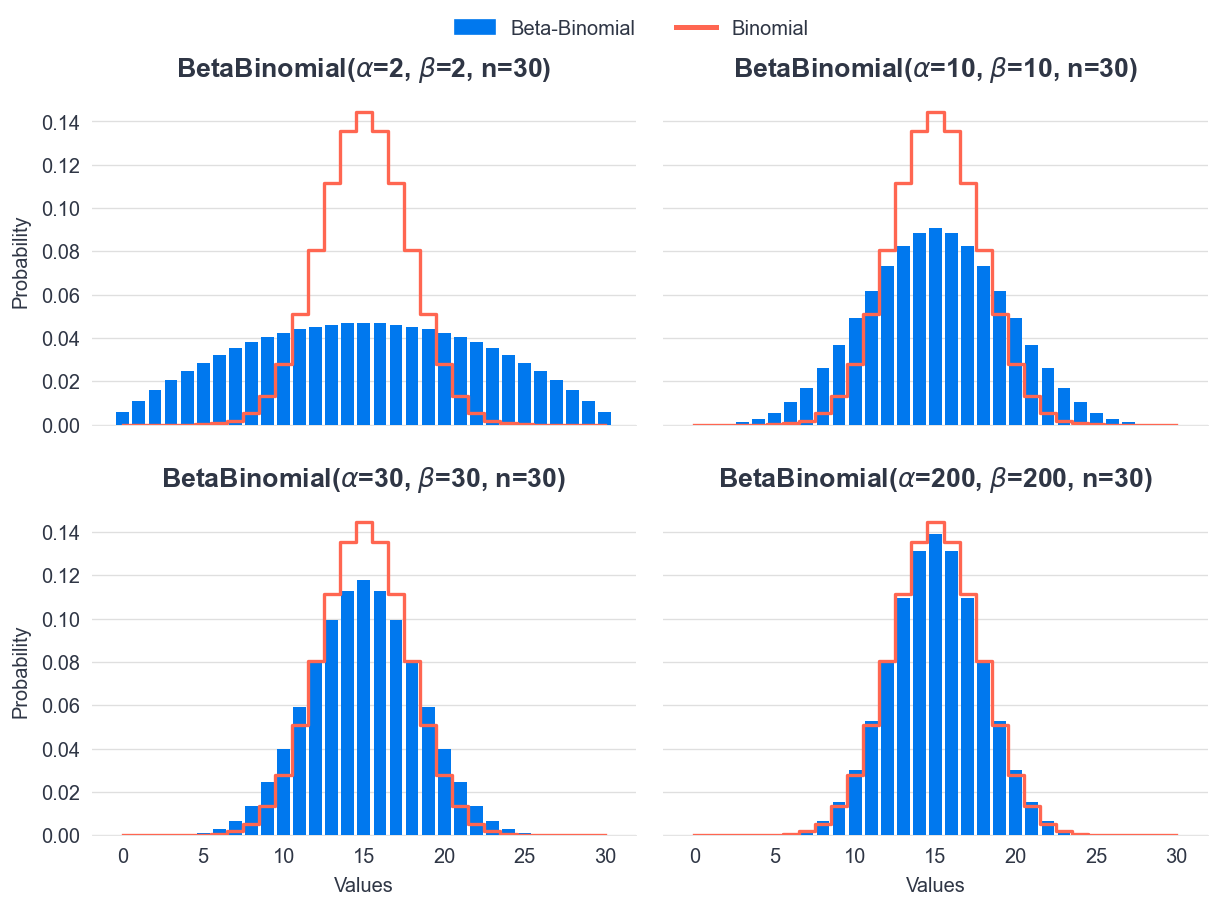

In [41]:
fig, axes = plt.subplots(
    2, 2, figsize=(12, 8), sharey=True, sharex=True, gridspec_kw={"wspace": 0.05, "hspace": 0.25}
)

n = 30
x = np.arange(n + 1)
alphas = [2, 10, 30, 200]
betas = [2, 10, 30, 200]

for alpha, beta, ax in zip(alphas, betas, axes.ravel()):
    rv = pm.BetaBinomial.dist(alpha, beta, n)
    pdf = np.exp(pm.logp(rv, x).eval())
    ax.bar(x, pdf)
    ax.step(x, stats.binom.pmf(x, 30, 0.5), color="C4", where="mid", linewidth=2)
    ax.set(title=f"BetaBinomial($\\alpha$={alpha}, $\\beta$={beta}, n={n})")

axes[0, 0].set(ylabel="Probability")
axes[1, 0].set(xlabel="Values", ylabel="Probability")
axes[1, 1].set(xlabel="Values")

handles = [
    Patch(color="C0", label="Beta-Binomial"),
    Line2D([], [], color="C4", lw=3, label="Binomial")
]
legend = fig.legend(
    handles=handles,
    bbox_to_anchor=[0.5, 0.95],
    fontsize=12,
    loc="center", 
    ncol=2,
    frameon=False
)

The mathematical expression of the mean and the variance of the Beta-Binomial distribution is not very simple, so we don't show it here. Don't worry, you can find it below. For the time being, we can still understand how the Beta-Binomial distribution works with a nice chart. In all cases, the $\alpha$ and $\beta$ are chosen so the probability of success is 0.5 and the sample size is $n=30$.

In blue we have the Beta-Binomial distribution and in red the Binomial. In the first panel, the Beta-Binomial differs a lot from the Binomial. The former has a much larger variability than the latter. As the values of $\alpha$ and $\beta$ increase, the the Beta-Binomial distribution tends to the Binomial. 

Similarly to the relationship between the Gamma-Poisson and the Poisson, where $\alpha=0$ indicated no extra variability, here the no extra variability occurs when $\alpha$ and $\beta$ tend to infinity. In practice, when they are very large.

**Want to have fun?** Here are the functions that compute the mean and the variance of the Beta-Binomial distribution. Tweak the parameter values and have fun with it!

In [42]:
def beta_binomial_mean(n, alpha, beta):
    return (n * alpha) / (alpha + beta)

def beta_binomial_variance(n, alpha, beta):
    t1 = (n * alpha * beta) / (alpha + beta) ** 2
    t2 = (alpha + beta + n) / (alpha + beta + 1)
    return t1 * t2

n, alpha, beta = 15, 3, 6

## How does it work in regression settings?

$$
\begin{aligned}
\text{logit}(\pi) &= \beta_0 + \beta_1X_1 + \cdots + \beta_pX_p \\
\kappa &\sim \text{SomePrior} \\
\alpha &= \pi \cdot \kappa \\
\beta &= (1 - \pi) \cdot \kappa \\
Y &\sim \text{BetaBinomial}(\alpha, \beta, n)
\end{aligned}
$$

This section is almost done. There's just one final thing before we can go to the section recap. 

Along the course we've been covering regression models, where we use a linear combination of predictor variables and coefficients to describe some function of the mean of a probability distribution. For example, in logistic regression we model the logit of the mean, $\text{logit}(\pi)$ with a linear predictor $\beta_0 + \beta_1 X_1 + \cdots + \beta_p X_p$. 

In this case, we also have a mean parameter $\pi$, but it does not enter the likelihood directly since none of $\alpha$, $\beta$, or $n$ represents the mean. So, how does it work?

Turns out we can use an alternative parametrization of the beta distribution, in terms of the mean $\pi$ and a precision parameter $\kappa$ because it's possible to then compute $\alpha$ and $\beta$ out of them.

As in the logistic regression, we model $\text{logit}(\pi)$ as a linear combination between parameters and predictors. In addition, we have to pick a prior for the precision $\kappa$. With those, we compute $\alpha$ and $\beta$. And finally, we pass $\alpha$ and $\beta$ to the likelihood. 

That's it. This is advanced regression.

## Section Recap

* Compounding a Beta distribution with a Binomial results in the Beta-Binomial distribution
* It accounts for more variance than the Binomial distribution
* An alternative parametrization of the Beta distribution is used in regression
* When the precision $\kappa = \alpha + \beta$ tends to infinity, the Beta-Binomial tends to the Binomial

# The Beta-Binomial model in action

## Same issue, similar solution?

* We had a Poisson regression with overdispersion

* The Gamma-Poisson model (aka Negative Binomial) helped us to improve it

* Now we have a Binomial regression with overdispersion

* Will the Beta-Binomial work?

We used the Gamma-Poisson likelihood to get a model that allowed for more variation than the Poisson. 

## Our Beta-Binomial model

$$
\begin{aligned}
\beta_{\text{gender}[i]} &\sim \text{Normal}(0, 2) \\
\text{logit}(\pi_i) &= \beta_{\text{gender}[i]} \\
\kappa &\sim \text{Gamma}(5, 0.25) \\
\alpha_i &= \pi_i \cdot \kappa \\
\beta_i &= (1 - \pi_i) \cdot \kappa \\
\text{Admissions}_i & \sim \text{BetaBinomial}(\alpha_i, \beta_i, n_i) \\
\end{aligned}
$$

It's time to write down our model. 

Once again, we have a single predictor, gender, and we're sticking with the same non-informative prior. In this case, we also need to consider the precision parameter, $\kappa$, which is a continuous and positive quantity. For this parameter, we're going to use a gamma distribution with a shape of 5 and a rate of 0.25, which yields an mean of $5 / 0.25 = 20$ and a standard deviation of $\sqrt{5} / 0.25 = 8.9$ which is quite uninformative.

Finally, once we have $\pi_i$ and $\kappa$, we can compute the parameters $\alpha_i$ and $\beta_i$. Since $\pi$ is allowed to vary for each observation, so can $\alpha$ and $\beta$. The last step is to pass these parameters to the beta-binomial likelihood. Done!

## Sneak-peek into our prior

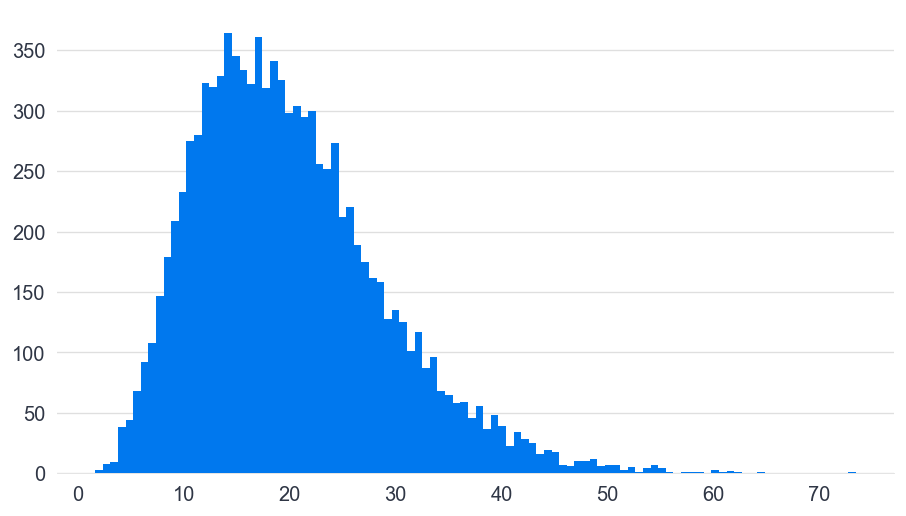

In [43]:
draws = pm.draw(pm.Gamma.dist(alpha=5, beta=0.25), draws=10_000)
plt.figure(figsize=FIGSIZE)
plt.hist(draws, bins=100);

With PyMC it's very easy to sneak-peak into a probability distribution. We just need to instantiate it and get some draws with `pm.draw()`. These are the same kind of draws you get with plain NumPy or SciPy.

The plot reinforces what we said before, it's quite an uninformative distribution on the precision parameter. On top of that, here we can notice that, before seeing the data, we don't believe the overdispersion is huge because values close to 0 are not very likely.

## Beta-Binomial model in Bambi

In [44]:
priors = {
    "gender": bmb.Prior("Normal", mu=0, sigma=2),
    "kappa": bmb.Prior("Gamma", alpha=5, beta=0.25)
}
formula = "p(admit, applications) ~ 0 + gender"
model_admissions_bb = bmb.Model(formula, df_admissions, family="beta_binomial", priors=priors)
model_admissions_bb

       Formula: p(admit, applications) ~ 0 + gender
        Family: beta_binomial
          Link: mu = logit
  Observations: 12
        Priors: 
    target = mu
        Common-level effects
            gender ~ Normal(mu: 0.0, sigma: 2.0)
        
        Auxiliary parameters
            kappa ~ Gamma(alpha: 5.0, beta: 0.25)

In [45]:
idata_admissions_bb = model_admissions_bb.fit(draws=2000, random_seed=1234)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p(admit, applications)_kappa, gender]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 3 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


The prediction machine that lives inside you is very well trained to know what's going to happen now.

First, we create a dictionary to pass Bambi the priors that we want to use in the model, including the new parameter $\kappa$. Once we have that, we create the model formula, which is the same as before because we're not changing how we model the mean. The last step is to glue all the things together with a when we instantiate the model. Just make sure you use the `"beta_binomial"` built-in family. That's it! We have our beta-binomial regression model in Bambi.

And do you know what do we have to do with it now? Yes! We sample from the posterior distribution. 

## Overdispersion?

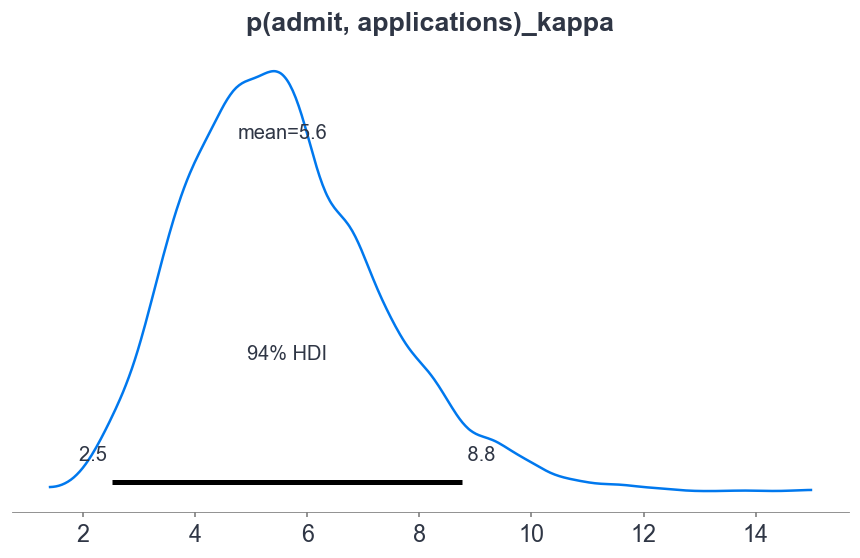

In [46]:
fig, ax = plt.subplots(figsize=FIGSIZE)
az.plot_posterior(idata_admissions_bb, var_names="p(admit, applications)_kappa", ax=ax);

There's a fundamental question lingering in the air: Do the data and the model support the existence of extra binomial variability?

Now that we have samples from the posterior, we can answer it by looking at the posterior of the precision parameter. According to our previous exploration, there's extra variability when the precision parameter is not very large. 

From the marginal posterior of the precision $\kappa$ the first thing we highlight is the 94% HDI. It goes from 2.4 to 8.9, which are quite small for the precision parameter. 

All in all, and as we expected, now that the model allows for extra variability, we can confirm the data gives support to that.

## The new posterior predictive distributions

In [47]:
model_admissions_bb.predict(idata_admissions_bb, kind="pps")

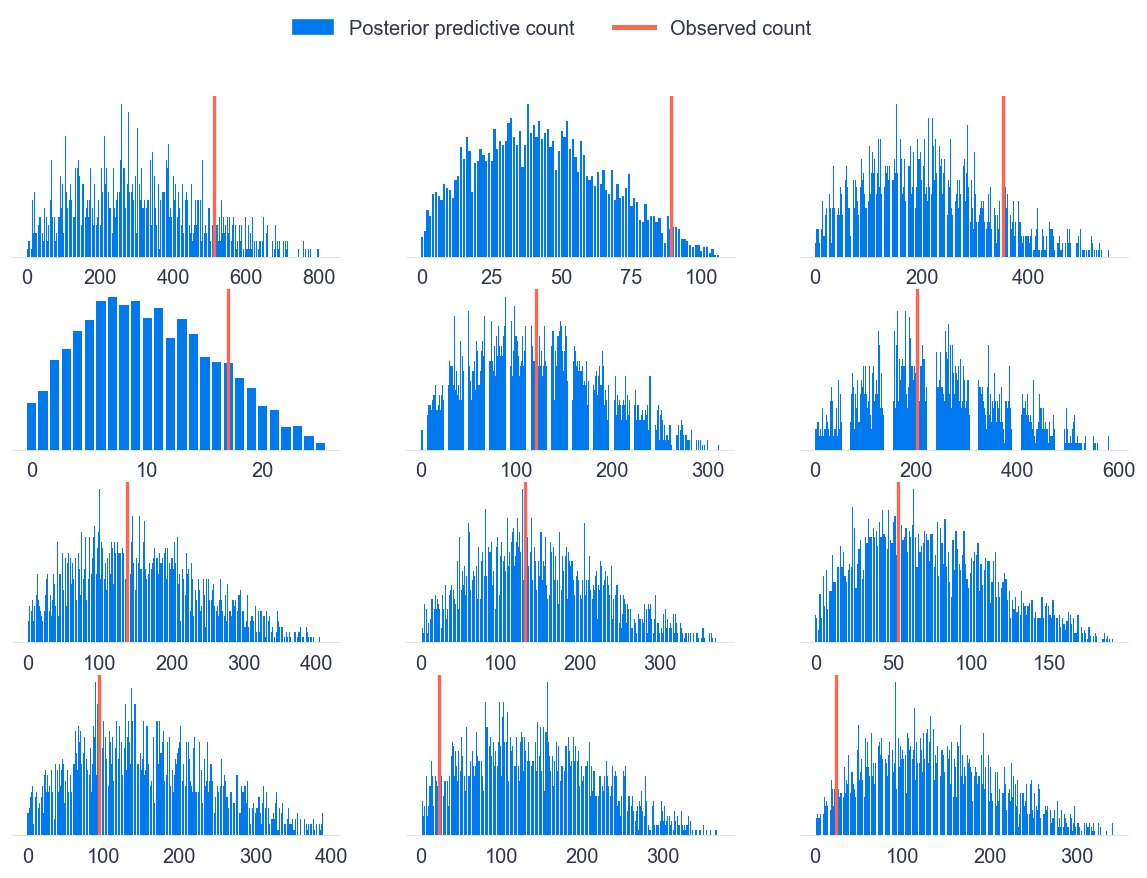

In [48]:
fig, axes = plt.subplots(4, 3, figsize=(12, 8))

for i, ax in enumerate(axes.ravel()):
    draws = (
        idata_admissions_bb
        .posterior_predictive["p(admit, applications)"].sel({"p(admit, applications)_obs": i})
        .to_numpy()
        .flatten()
    )
    x, counts = np.unique(draws, return_counts=True)
    ax.bar(x, counts / counts.sum());
    ax.axvline(df_admissions.iloc[i]["admit"], color="C4", lw=2)
    ax.set_yticks([])

handles = [
    Patch(color="C0", label="Posterior predictive count"),
    Line2D([], [], color="C4", lw=3, label="Observed count")
]
legend = fig.legend(
    handles=handles,
    bbox_to_anchor=[0.5, 0.95],
    fontsize=12,
    loc="center", 
    ncol=2,
    frameon=False
)

We use the same code of the previous section to get the posterior predictive distribution for each observation with the new posterior samples. 

Unlike the previous section, all the observed values fall within the posterior predictive distributions, indicating they're not unlikely to observe. That's great! Finally good news in this lesson!

Now, with the new beta-binomial distribution, the model makes room for extra variability which results in a better fit in the sense that the observed values are not unlikely for the model.

However, it's not all roses. Have a look at what we have next.

## The price we paid

In [49]:
idata_admissions.posterior_predictive["p(admit, applications)"].var(("chain", "draw")).to_numpy()

array([261.57796494,  24.225099  , 165.60122244,   5.21175775,
        89.44312494, 166.22277344, 118.82042244,  97.243964  ,
        48.14044375, 102.57782194, 103.15596975,  85.40653775])

In [50]:
idata_admissions_bb.posterior_predictive["p(admit, applications)"].var(("chain", "draw")).to_numpy()

array([28660.12504494,   532.380524  , 13250.9766    ,    32.516224  ,
        4474.50836975, 15410.665051  ,  7664.30368944,  6209.392884  ,
        1674.14611694,  7177.356979  ,  6154.07440775,  5260.04137244])

From the plot of the posterior predictive distributions of the beta-binomial regression and the posterior of the precision parameter you should be very well aware that the variability of the beta-binomial model is larger than the binomial model. Indeed, it's a feature and not a bug.

Let's have a look at those. All we need is to compute the variance of the posterior predictive draws over chains and draws. What we get is the variance of the posterior predictive distribution for every observation. 

Do you see that? Yes, the ratios between the second and the first one are huge. 

Now the model accounts for some extra dispersion that makes the observation no longer extreme. But we paid a big price, our uncertainty got so much higher!

## And what about the gender effect?

In [51]:
idata_admissions_bb.posterior["p"] = expit(idata_admissions_bb.posterior["gender"])

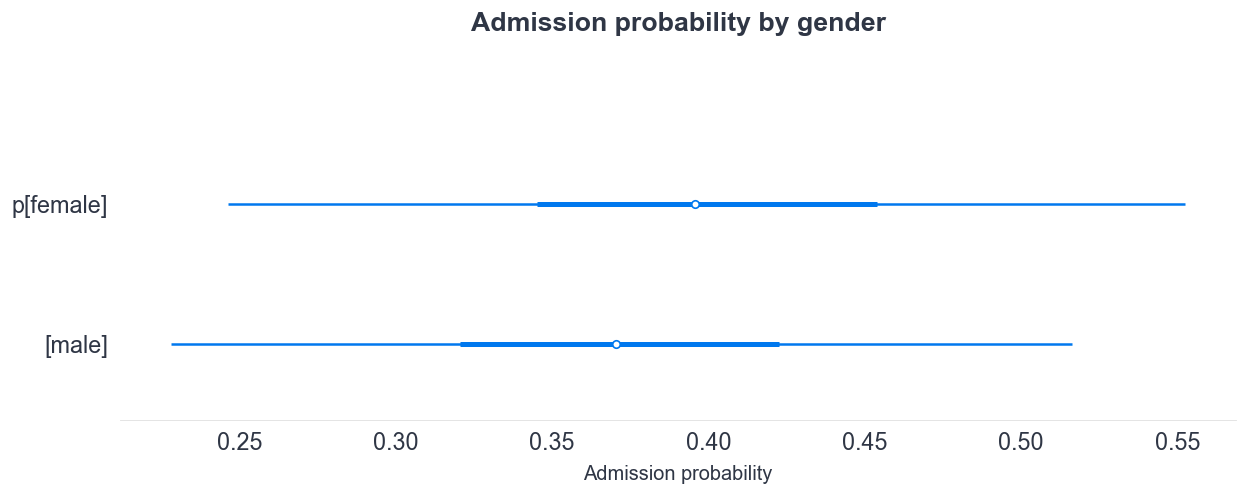

In [52]:
fig, ax = plt.subplots(figsize=(12, 4))
az.plot_forest(idata_admissions_bb, var_names="p", combined=True, ax=ax)
ax.set(xlabel="Admission probability", title="Admission probability by gender");

Let's have a final look at the gender effect, using the beta-binomial family.

Remember the binomial regression model led us to conclude males were more likely to be admitted by females. However, that was not what we concluded when we explored the data.

Here we have a look at the posterior probability of admission using the new model. And you know what? There's no gender difference. Yep, that's right. While the previous model was pretty confident about males having a higher chance of getting admitted, the beta-binomial regression model tells us otherwise. It's more aligned with the actual data, which is pretty neat, don't you think?

## Section Recap

* We learned about overdispersion in binomial settings
* It was quite an extreme example
    * We were not very careful (i.e. omitted the department variable)
* The beta-binomial model reveals extra variability is needed
    * The posterior predictive distributions are too variable
* The new model shows no gender effect
    * More in accordance with the data

Time for a recap! 

We have been learning a lot about overdispersion. In the last sections we learned about overdispersion in binomial settings and some alternatives such as the beta-binomial distribution. 

In the example covered so far the problem was quite obvious, we omitted the department variable which seemed to be very relevant because different departments have different admission rates. As a result, we ended up drawing incorrect conclusions about applicant gender due to discarding important information.

The Beta-Binomial distribution helped us in some way. Not because it accounted for the information from the relevant missing variable, but it did account for the extra uncertainty, which was reflected in the width of the posterior predictive distributions. This way, it prevented us from being overconfident in the conclusions. 

Finally, and on a more practical side, using the new family had a very impacting consequence: the new model shows no gender effect, aligning with our initial findings when we first explored the data.

# Counting grasshoppers

In this section, we're diving into a new case where overdispersion pops up in a binomial model. To tackle this, we're bringing a new dataset that's quite interesting. As the title suggests, we'll be counting grasshoppers.

## Life is not that simple

* The admissions problem was made up

* Overdispersion can be caused by a variety of reasons

The overdispersion problem we encountered with the UC Berkeley admissions data was somewhat simple. It was a small dataset, and we could easily pinpoint the culprit. After all, we were the ones who made up the problem in the first place.

But life is not that simple. There are many other interesting problems where our models can suffer from overdispersion. And it's not always straightforward to detect what's going on. As we'll discover, there can be other causes on top of omitted variables.

Wouldn't it be nice to see one example of that? Of course, yes! Just help me count grasshoppers.

## Grasshoppers?

<center>
  <img src="imgs/grasshoppers.png" style="width:550px"; class="w-55p"/>
</center>

Before we dive into any actual work, it's crucial that we're all on the same page and understand what we mean when we talk about grasshoppers. That's why we've brought in this nice drawing that showcases these nice grasshoppers. Yes, grasshoppers – those tiny insects that hop around from one side to the other.

## The grasshoppers data

In [53]:
df_grasshopper = pd.read_csv("data/grasshopper.csv")
df_grasshopper

,date,location,y,n
0,1,1,12,21
1,1,1,8,12
2,2,1,32,34
3,2,1,22,29
4,2,1,16,19
...,...,...,...,...
83,3,5,20,25
84,3,5,21,24
85,3,5,18,21
86,3,5,21,24


Now let's see the data we have for these little green creatures.

The dataset has information about the descendants of 88 female grasshoppers. They were examined to see whether or not they possessed a particular chromosome that all the mothers possessed. The female grasshoppers came from 5 locations and 3 different years (date) groupings. 

Let's do some exploratory data analysis first.

You can actually double-check we have 5 locations and 3 years:

In [54]:
print("Locations:", df_grasshopper["location"].unique())
print("Dates:", df_grasshopper["date"].unique())

Locations: [1 2 3 4 5]
Dates: [1 2 3]


## Thinking like a binomial

$$
\begin{aligned}
Y_i &= \text{Number of descendants with the chromosome for mother } i \\
n_i &= \text{Number of descendants for mother } i \\
\pi_i &= \text{Probability a descendant has the chromosome for mother } i \\
\end{aligned}
$$

Before diving deep into the exploration of the data, let's think a little bit like a binomial distribution. 

In this setting, we need to identify the outcome variable, which is the "number of successes". Here "success" is a descendant that presents the chromosome of interest. So the outcome variable $Y$ is the number of descendants with the chromosome for a given mother. 

At the same time, we need to get the "number of trials", which represents the upper bound or denominator. Here, every descendant is a trial (that can show the chromosome or not). So the number of trials $n_i$ is given by the number of descendants.

And finally, we also have the "success probability" playing an important role. Since a "success" here is a descendant showing the chromosome, the success probability is the probability that a descendant has the chromosome. 

We're all set to move onto some viz!

## Inspecting the grasshoppers

In [55]:
df_grasshopper.groupby(["date", "location"]).size().to_frame("count")

count
date location       
1    1             2
     2             6
     3             4
     5             8
2    1            12
     3            10
     5            19
3    2            10
     4             9
     5             8

A very simple summary such as a count can already give a lot of information. Let's count the number of records we have for every combination of date and location.

We can immediately notice two quite relevant facts: 

1.  The number of records per combination of date and location varies a lot. It ranges between 2 and 19.
2.  Not all combinations of date and location are represented.

Simple counts can be so insightful!

## The denominator varies a lot

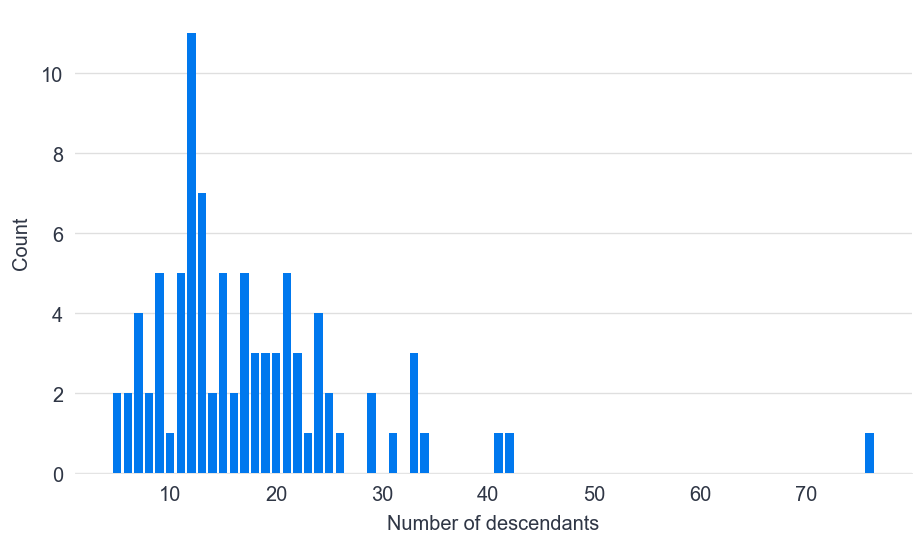

In [56]:
n_values, n_counts = np.unique(df_grasshopper["n"], return_counts=True)

fig, ax = plt.subplots(figsize=FIGSIZE)
ax.bar(n_values, n_counts)
ax.set(xlabel="Number of descendants", ylabel="Count");

In [57]:
df_grasshopper["n"].min(), df_grasshopper["n"].max()

(5, 76)

There's more to it. We just found the number of records per date and location varies a lot. But, what about the number of descendants per mother? It's a very important quantity as well because it's the denominator we care about.

Here we can use a plot. We count how many records have the different numbers of descendants and display the counts in a barplot. Most mothers have between 20 and 30 descendants. That's where tallest bars are concentrated. Also, have a look at the range on the horizontal axis. This is telling us the number of descendants per mother can vary a lot. In other words, grasshopper mothers tend to have very different numbers of offspring.

All in all, the takeaway is that the binomial denominator varied from 5 to 76 which tells us the data are very unbalanced. Let's create a model now.

## A binomial model

$$
\begin{aligned}
\beta_{\text{date}, \text{location}} &\sim \text{Normal}(0, 1) \\
\text{logit}(\pi_i) &= \beta_{\text{date}[i], \text{location}[i]} \\
Y_i & \sim \text{Binomial}(\pi_i, n_i) \\
\end{aligned}
$$

In [58]:
priors = {"date:location": bmb.Prior("Normal", mu=0, sigma=1)}
model_grasshopper = bmb.Model(
    "p(y, n) ~ 0 + date:location", 
    df_grasshopper, 
    priors=priors, 
    family="binomial", 
    categorical=["date", "location"]
)
model_grasshopper

       Formula: p(y, n) ~ 0 + date:location
        Family: binomial
          Link: p = logit
  Observations: 88
        Priors: 
    target = p
        Common-level effects
            date:location ~ Normal(mu: 0.0, sigma: 1.0)

The more technical ones can write down

$$
Y = \text{Number of descendants with the chromosome out of } N \text{ descendants.}
$$

which responds to the generic binomial distributed variable

$$
Y = \text{Number of successes out of } N \text{ trials.}
$$

🤔 **Rethinking** 🤔

The binomial distribution assumes the _trials_, the descendants in this case, are independent. In other words, the presence or absence of the chromosome for any given descendant is not associated with the presence or absence of the chromosome for any other descendant of the same mother. Are we in a position where we can guarantee this assumption is true? I'm not so sure. But that's what statistics is all about — making assumptions that might not be entirely true, but are valid enough to treat the model as a reasonable approximation of a real-world phenomenon.

The grasshopper data is suitable for a binomial distribution. The response variable is the number of descendants with the chromosome, out of the total number of descendants. So, this is a bounded count.

The covariates in the model are `date` and `location`. In this case, we will have one coefficient for each combination of `date` and `location`. This is known as an interaction effects model. These coefficients have a non-informative normal prior with $\mu=0$ and $\sigma=1$. 

At this point we are experts at writing Bambi models. The two relevant things here are the interaction between `date` and `location` and the usage of the `categorical` keyword. Since `date` and `location` are both integers in the pandas data frame but we now they are categorical, and we want them treated as such, we ask Bambi to internally convert `date` and `location` to categorical variables before creating the model. That's is, easy-peasy.

## Fit and check traces

In [59]:
idata_grasshopper = model_grasshopper.fit(chains=4, random_seed=1295)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [date:location]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 5 seconds.


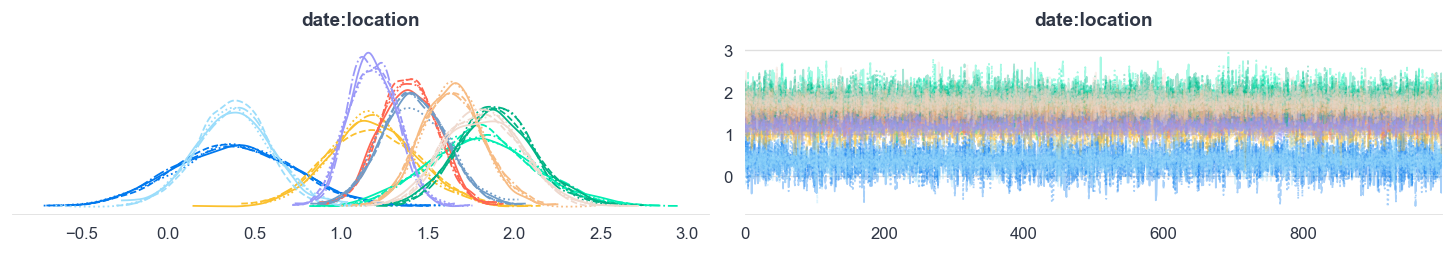

In [60]:
# Only select the available combinations
date_locs = ["1, 1", "1, 2", "1, 3", "1, 5", "2, 1", "2, 3", "2, 5", "3, 2", "3, 4", "3, 5"]
az.plot_trace(
    idata_grasshopper.posterior.sel({"date:location_dim": date_locs}), 
    backend_kwargs={"layout": "constrained"}
);

Once we have the posterior samples we can inspect the marginal posterior and the traces.

If we simply use `az.plot_trace` you'll notice there are several distributions that are not only wide, but also exactly equal. Having a look at the InferenceData object we can realize those are the combinations of location and date that are not present in the data. Given we create the full-interaction model, these are added.

So what do we have to do now? Luckily, we can subset the posterior draws to only keep those from the combinations of date and location that are observed. Since it's a rather small problem, we can manually write down these combinations in a list. Then we just use the `.sel` method from xarray and pass the subsetted data to `plot_posterior`. The new chart is exactly what we want!

Oh, and don't forget about the reason why we created this chart. All the traces look very noisy like we want them, and all the marginal posteriors represent the same posterior distribution. Awesome!

## Forestplot to make comparisons easy

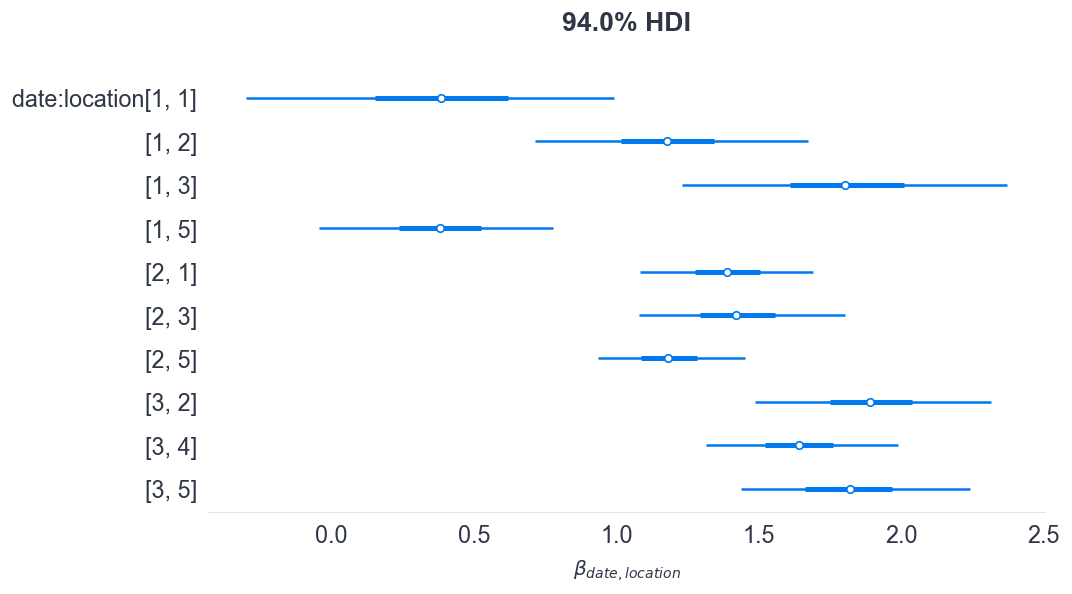

In [61]:
fig, ax = plt.subplots(figsize=FIGSIZE)
az.plot_forest(idata_grasshopper.posterior.sel({"date:location_dim": date_locs}), combined=True, ax=ax)
ax.set(xlabel="$\\beta_{date, location}$");

Alright, let's create a forest plot to compare the posterior distributions of the coefficients across different dates and locations. Notice that here we're also using `.sel` to retain only the dimensions of interest.

Once we've got the plot, we can move on to interpreting it by comparing the coefficients.

The first thing that catches our eye is that the posterior distributions vary across different dates and locations. For example, as the date changes from 1 to 3, the mean of the distribution increases. However, we should also notice that for the first date, the variability between locations and within a location is quite significant, making it tough to observe a clear pattern.

Another point to highlight is that, except for the difference between locations 3 and 5 within the date 1, there aren't significant intra-date differences.

Lastly, it's worth noting that the variability of the posterior distributions isn't consistent across the board. The main difference is the variability is quite higher in the first date.

## A probability scale to make it insightful

In [62]:
idata_grasshopper.posterior["pi"] = expit(idata_grasshopper.posterior["date:location"])

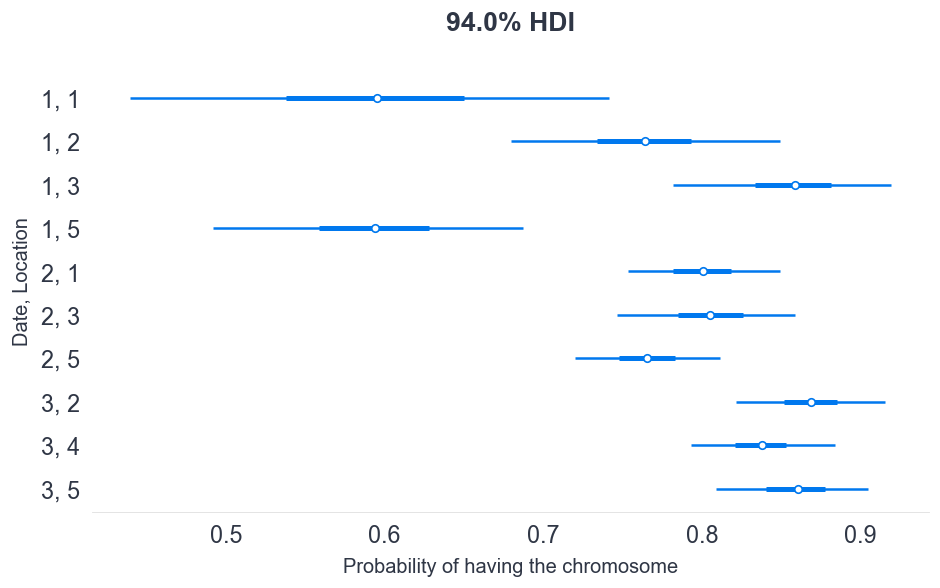

In [63]:
fig, ax = plt.subplots(figsize=FIGSIZE)
az.plot_forest(
    idata_grasshopper.posterior.sel({"date:location_dim": date_locs}), 
    combined=True, var_names="pi", ax=ax
)
ax.set(xlabel="Probability of having the chromosome", ylabel="Date, Location", yticklabels=reversed(date_locs));

## Posterior predictive checks? Yes!

In [64]:
model_grasshopper.predict(idata_grasshopper, kind="pps")

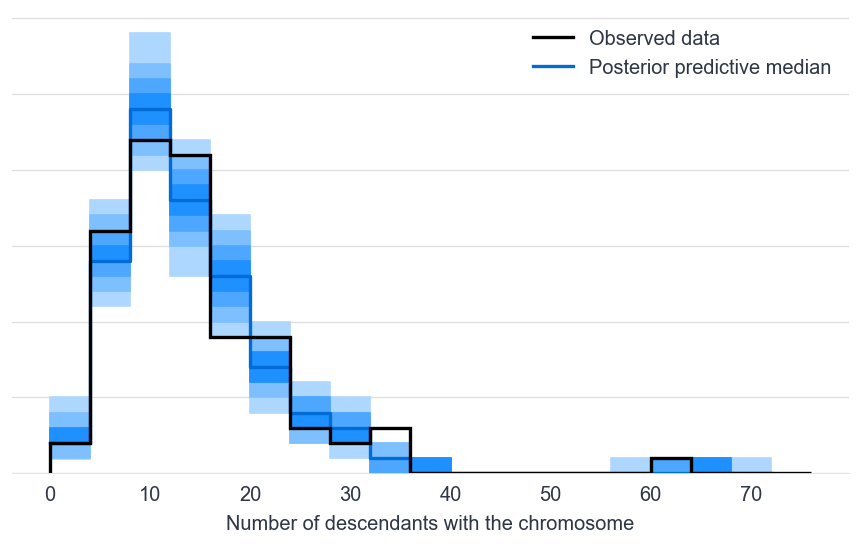

In [65]:
bins = np.linspace(0, 76, num=20)
fig, ax = plt.subplots(figsize=FIGSIZE)
plot_ppc_discrete(idata_grasshopper, bins, ax)
ax.set(xlabel="Number of descendants with the chromosome", yticklabels=[]);

Let's plot the posterior predictive checks using the function we created earlier in this lesson.

While there isn't a perfect agreement between the observed data and the credible intervals obtained from the posterior predictive distribution, we also don't see big differences that would lead us to conclude that the model significantly deviates from the data.

But then, what's the issue?

## (Many) Posterior predictive distributions

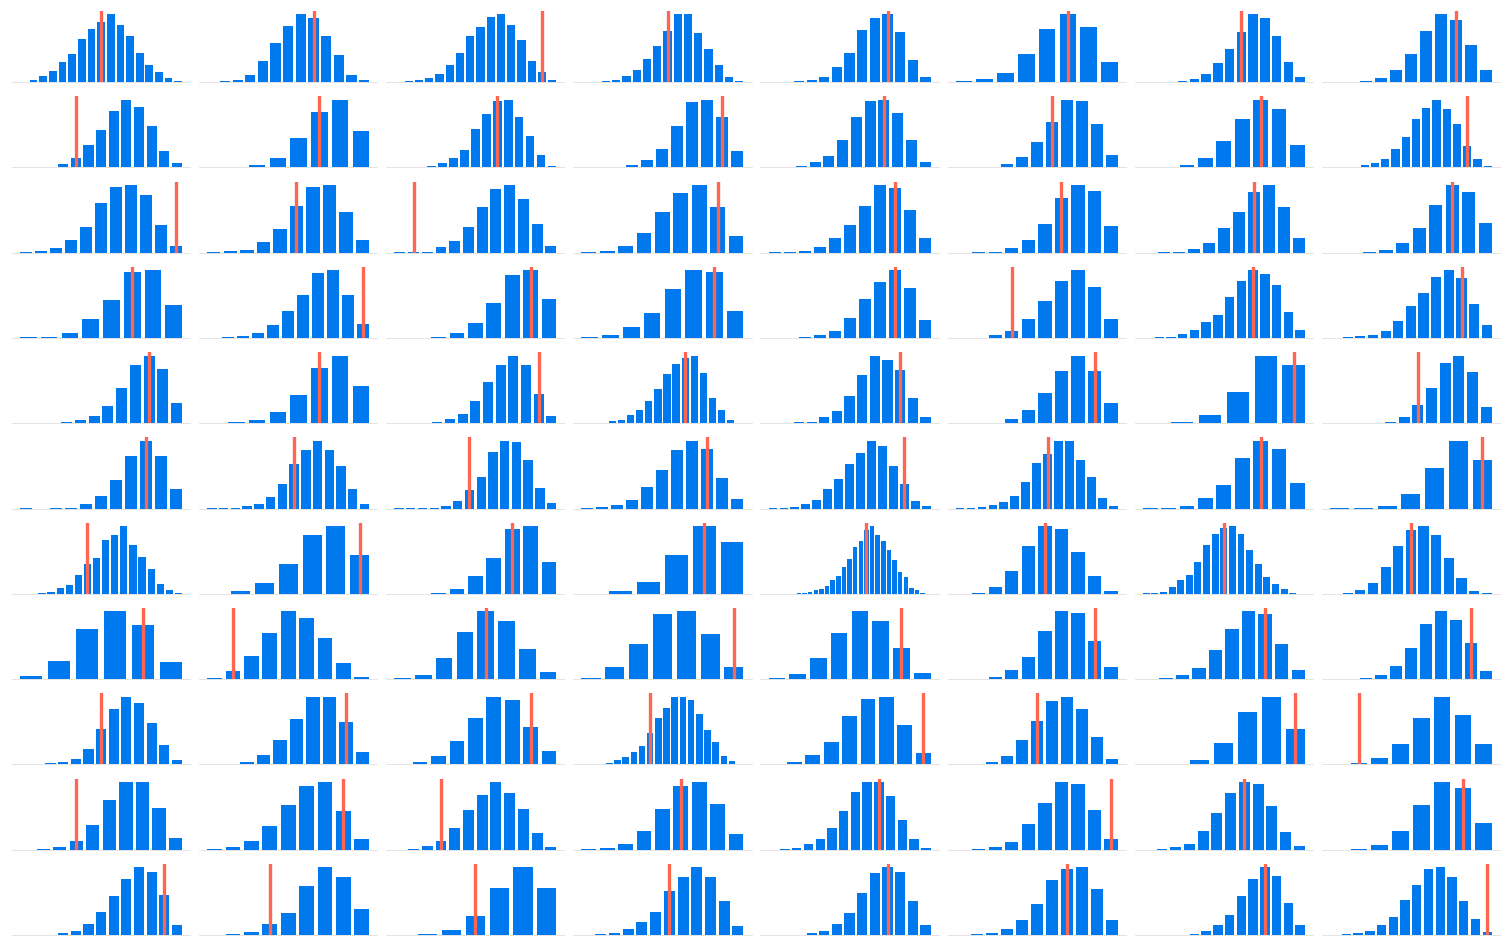

In [66]:
fig, axes = plt.subplots(11, 8, figsize=(16, 10), gridspec_kw={"wspace": 0.05})

for i, ax in enumerate(axes.ravel()):
    draws = (
        idata_grasshopper
        .posterior_predictive["p(y, n)"]
        .sel({"p(y, n)_obs": i})
        .to_numpy()
        .flatten()
    )
    x, counts = np.unique(draws, return_counts=True)
    ax.bar(x, counts / counts.sum());
    ax.axvline(df_grasshopper.loc[i]["y"], color="C4", lw=2)
    ax.set_xticks([])
    ax.set_yticks([])

Now we have many groups (given by combinations of `date` and `location`) and multiple observations within group (e.g. descendants from multiple mothers). So we have many conditional distributions to compare. How many? 88 to be precise, because we have 88 rows in the dataset.

We create a (very) big figure where we have 88 panels, one for each observation. As in the previous visualization, the posterior predictive distribution is represented with the blue bars, and the observed value, the number of descendants with the chromosome, is indicated with the vertical red line.

The actual values are not the important thing to observe here. We want to see how often the observed values fall in the tails of the predictive distributions. And we see it happens quite often.

Here we don't have such a serious overdispersion problem. The observed value and the posterior predictive distribution are not completely shifted. However, in many cases, the observed values fail in the tails of the distribution, which indicates moderate overdispersion.

## Summarizing

In [67]:
y_hdi = az.hdi(idata_grasshopper.posterior_predictive, hdi_prob=0.95)["p(y, n)"].to_numpy()
y_obs = df_grasshopper["y"].to_numpy()
is_within_hdi = (y_obs >= y_hdi[:, 0]) & (y_obs <= y_hdi[:, 1])
round(is_within_hdi.mean(), 4)

0.8864

After looking at the previous chart, we might wonder: what do I do if I have many more groups? In this problem, we have 88 groups, and it's already been challenging to obtain a suitable and interpretable visualization. Wouldn't it be great to have a numerical summary that provides the same information in a condensed way?

It turns out we have everything we need for the number we're looking for. We just need to be a bit creative and think carefully about what we're seeking. 

What did we do when we interpreted the graph? Well, we checked if the observed value fell within the central part of the distribution. One way to represent the "central part" of the distribution is with an HDI (Highest Density Interval). And once we obtain it, we can calculate the proportion of times the observed value falls within the HDIs. If the model doesn't exhibit overdispersion issues, we expect the proportion of times the observed value falls within the HDI to be similar to the probability of the HDI.

We constructed the HDI based on a 95% probability. In an ideal world, the proportion of values within it would be 95%. In our case, it's 89%, which is lower than 95%, but it's not bad at all.

## Section Recap

* Introduced a new dataset
    * Number of grasshopper offsprings with a certain chromosome
    * Different dates and locations
* Built a binomial model including the interaction effect between date and location 
* Observed varying probabilities of having the chromosome across the different groups
* Posterior predictive checks indicated reasonable model fit without apparent issues.
* Looked for overdispersion issues
    * Visualization
    * Numerical summaries

This was a short but intense section. We introduced a new dataset where we have the the number of offspring of grasshoppers with a specific chromosome, together with different dates and locations.

We fitted a binomial model to predict the number of descendants with a particular chromosome, considering the interaction effect between location and date as predictors. We observed that the probability of having the chromosome isn't the same in all cases. Also, when we plotted the posterior predictive checks, we noticed that there's no reason to believe our model is fitting the data poorly. In fact, it shows an acceptable fit.

We then decided to plot the posterior predictive distributions alongside the observed values, looking for overdispersion issues. We learned that one way to assess model fit and overdispersion problems is by calculating the proportion of times the HDI of the predictive distribution contains the observed value.

In this case, the "issue" of overdispersion doesn't seem to be as pronounced. At least, it's not as evident as it was with the UC Berkeley admission data. Meanwhile, we're not omitting a predictor variable in this case. On the contrary, we used the most saturated model based on the available predictors, including the interaction between date and location.

Ultimately, this has been a section filled with information. Let's see how the beta-binomial distribution works in the next one.

# Beta-Binomial for grasshoppers

It's time for a second iteration with the grasshopper problem. First, let's do a quick review to clarify where we are and where we're heading.

## Where we are

* Grasshopper data

* Binomial model

* No serious overdispersion issues

* We still have reasons to try more flexible models 

In the previous section, we worked with the grasshopper data and fitted a binomial model to predict the quantity of offspring with a specific chromosome based on date and location. We analyzed the posterior distribution and concluded that the probability of having this chromosome isn't always the same. 

We also conducted various tests on the posterior distribution and found no clear signs of serious overdispersion. However, one could argue that we encountered some indications that lead us to suspect a slight overdispersion might be present. Moreover, after all, we are in a lesson focused on overdispersion. Do we need more excuses to fit a more flexible model? I think not!

## Where we go

* You're familiar with everything we'll do next 

* Fit a beta-binomial model to the grasshopper data

* Explore inferences
    * Evaluate the amount of overdispersion inferred by the model
    * Compare posterior probability of success with the previous model

* Check posterior predictive distribution coverage

Now that we know where we stand, let's take a look at where we're headed.

I feel obligated to mention that you might already be familiar with most of what we're going to cover next. There's nothing super new or groundbreaking. However, it's important for our learning journey to see how a more flexible model works with the grasshopper data.

To do that, we're going to fit a beta-binomial model. Then, we'll explore the posterior distribution. First, we'll have a look at the marginal posterior distribution of $\kappa$, the overdispersion parameter (want to take a guess whether it'll be high or low?). Secondly, we'll compare the posterior probability of a grasshopper having the chromosome under study for the two models. Lastly, we'll check the coverage of the posterior predictive distribution.

Oh, and before I forget. Towards the end of this section, we'll do one last thing with our posteriors. I can only say that "there's no free lunch."

## A prior for the precision $\kappa$

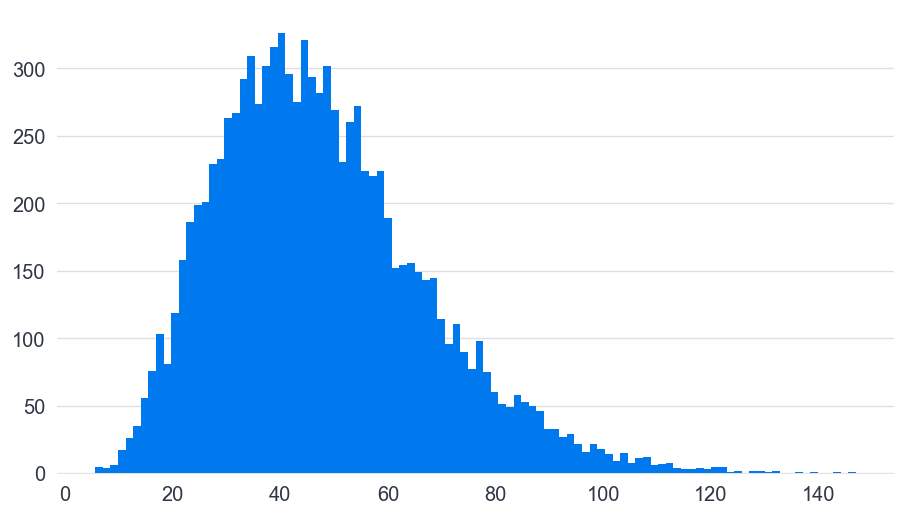

In [68]:
draws = pm.draw(pm.Gamma.dist(alpha=6, beta=0.125), draws=10_000)
plt.figure(figsize=FIGSIZE)
plt.hist(draws, bins=100);

Based on what we saw in the analysis of the last model we created, this dataset shows less overdispersion than the UC Berkeley data. That's why we're going to use a prior distribution for $\kappa$ that assigns a very low probability to very high overdispersion.

In this case, we're using a gamma distribution with $\alpha=6$ and $\beta=0.125$. If we obtain samples using the `pm.draw` function and visualize them with a histogram, we can see that the probability of low values of $\kappa$ is almost negligible, and values greater than 50 are very likely. In other words, our prior is skeptical of large overdispersion. 

Before moving on, remember there's no best prior. There are good priors and bad priors. Priors that one can defend, and priors that don't make any sense at all. The key is to determine a prior distribution that makes sense based on the available information about the problem we're working on.

## The model

$$
\begin{aligned}
\beta_{\text{date}, \text{location}} &\sim \text{Normal}(0, 1) \\
\text{logit}(\pi_i) &= \beta_{\text{date}[i], \text{location}[i]} \\
\kappa &\sim \text{Gamma}(6, 0.125) \\
\alpha_i &= \pi_i \cdot \kappa \\
\beta_i &= (1 - \pi_i) \cdot \kappa \\
Y_i & \sim \text{BetaBinomial}(\alpha_i, \beta_i, n_i)  \\
\end{aligned}
$$

The model definition is very similar to the one we wrote for the admissions problem. The main difference is that this time we're including the interaction between date and location and thus there's a $\beta$ coefficient for every combination of them. On top of that, there are some differences between these priors and the ones we used before.I'm quite sure you can spot them 😉.

## The model in Bambi

In [69]:
priors = {
    "date:location": bmb.Prior("Normal", mu=0, sigma=1), 
    "kappa": bmb.Prior("Gamma", alpha=6, beta=0.125)
}
formula = "p(y, n) ~ 0 + date:location"
model_grasshopper_bb = bmb.Model(
    formula, df_grasshopper, priors=priors,  family="beta_binomial",  categorical=["date", "location"]
)
model_grasshopper_bb

       Formula: p(y, n) ~ 0 + date:location
        Family: beta_binomial
          Link: mu = logit
  Observations: 88
        Priors: 
    target = mu
        Common-level effects
            date:location ~ Normal(mu: 0.0, sigma: 1.0)
        
        Auxiliary parameters
            kappa ~ Gamma(alpha: 6.0, beta: 0.125)

In [70]:
idata_grasshopper_bb = model_grasshopper_bb.fit(chains=4, random_seed=1295)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [p(y, n)_kappa, date:location]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 7 seconds.


Now, we translate the math into code. You know what? There's nothing new here. While that may sound boring, it's actually great news! You've created so many models in Bambi, using many families, setting manual priors, tweaking even the small details, that you can see this chunk of code and you understand it completely. Congrats!

But what's absolutely necessary if we want to analyze the results is model fitting. This is also predictable now. We use the `.fit` method, specifying the number of chains and a seed to ensure result reproducibility, and there you go! We didn't come across any warnings or errors. Let's keep moving on!

## Inspect the overdispersion parameter

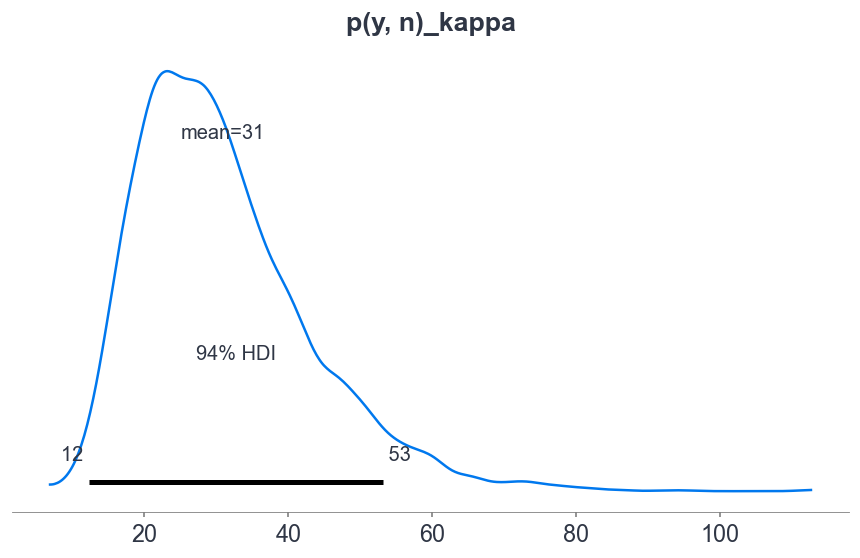

In [71]:
fig, ax = plt.subplots(figsize=FIGSIZE)
az.plot_posterior(idata_grasshopper_bb, var_names="p(y, n)_kappa", ax=ax);

As we did before, let's analyze the posterior distribution of the overdispersion parameter.

This time, we can observe that the posterior distribution has its associated probability concentrated around larger values, indicating that the overdispersion in these data is lower compared to the one in the admissions problem. This is not surprising for us. Thanks to time we dedicate to explore the data and the inferences from our models, we were able to anticipate this outcome.

Next, let's have a look at the inferences about the success probability under this beta-binomial model.

## Compare inferences

In [72]:
idata_grasshopper_bb.posterior["pi"] = expit(idata_grasshopper_bb.posterior["date:location"])

Again, we convert the model coefficients into probabilities to have a clearer interpretation of the results. 

Have a look at how we create the plot next.

## Compare inferences -- The Plot

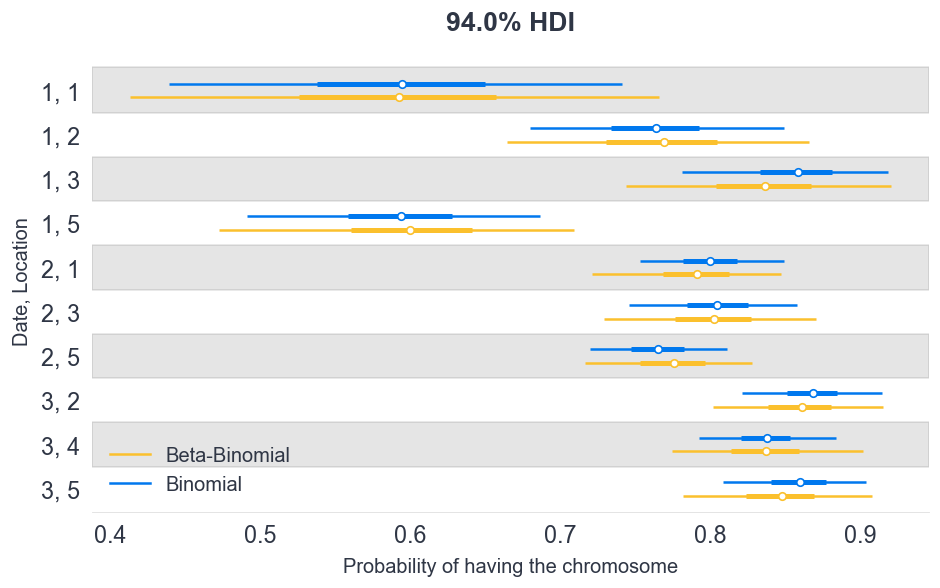

In [73]:
fig, ax = plt.subplots(figsize=FIGSIZE)
az.plot_forest(
    [
        idata_grasshopper.posterior.sel({"date:location_dim": date_locs}),
        idata_grasshopper_bb.posterior.sel({"date:location_dim": date_locs}),
    ], 
    model_names=["Binomial", "Beta-Binomial"], 
    var_names="pi", 
    combined=True,  
    ax=ax,
)
ax.get_legend()._set_loc(3) # lower left
ax.set(xlabel="Probability of having the chromosome", ylabel="Date, Location", yticklabels=reversed(date_locs));

This time, we have two models. The original model based on the binomial distribution, and the new model based on the beta-binomial. What's cool about `az.plot_forest` is that we can plot the posterior distributions for more than a single model at the same time, making it easier to compare inferences.

Have a look at the results. Unlike what happened with the UC Berkeley admissions problem, the coefficients estimated by the different models don't differ as much now, we only see small differences. For example, the posteriors are usually wider for the beta-binomial distribution. This puts us in a more conservative position when trying to find differences between dates and locations. However, in general terms, one ends up drawing similar conclusions about which groups are more likely to present the chromosome under study.

## Posterior predictive checks

In [74]:
model_grasshopper_bb.predict(idata_grasshopper_bb, kind="pps")

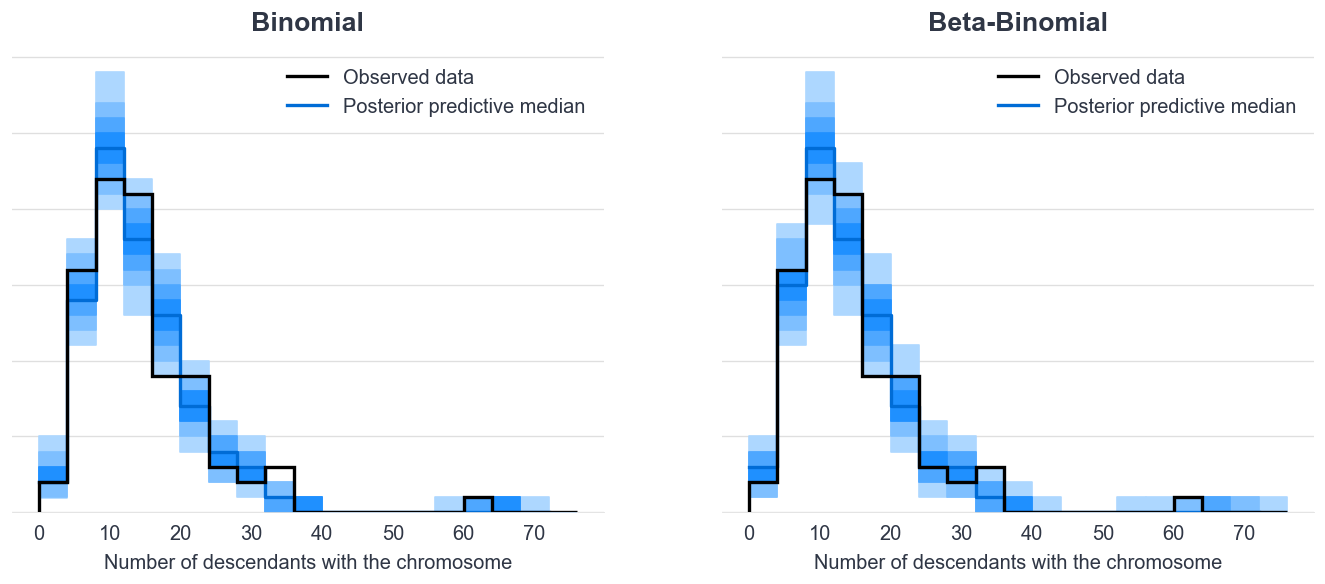

In [75]:
bins = np.linspace(0, 76, num=20)
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)
plot_ppc_discrete(idata_grasshopper, bins, axes[0])
axes[0].set(
    xlabel="Number of descendants with the chromosome", 
    title="Binomial",
    yticklabels=[]
)

plot_ppc_discrete(idata_grasshopper_bb, bins, axes[1])
axes[1].set(
    xlabel="Number of descendants with the chromosome", 
    title="Beta-Binomial",
    yticklabels=[]
);

Next, posterior predictive checks. We can see a slight improvement here. The black line indicating the observed data is now closer to the center of the intervals we plot, meaning the observed data is more likely under the new model.

However, it has to be said that the previous model wasn't the worst, and this one isn't the best. After all, that's what working with real data is all about.

## Posterior predictive distributions

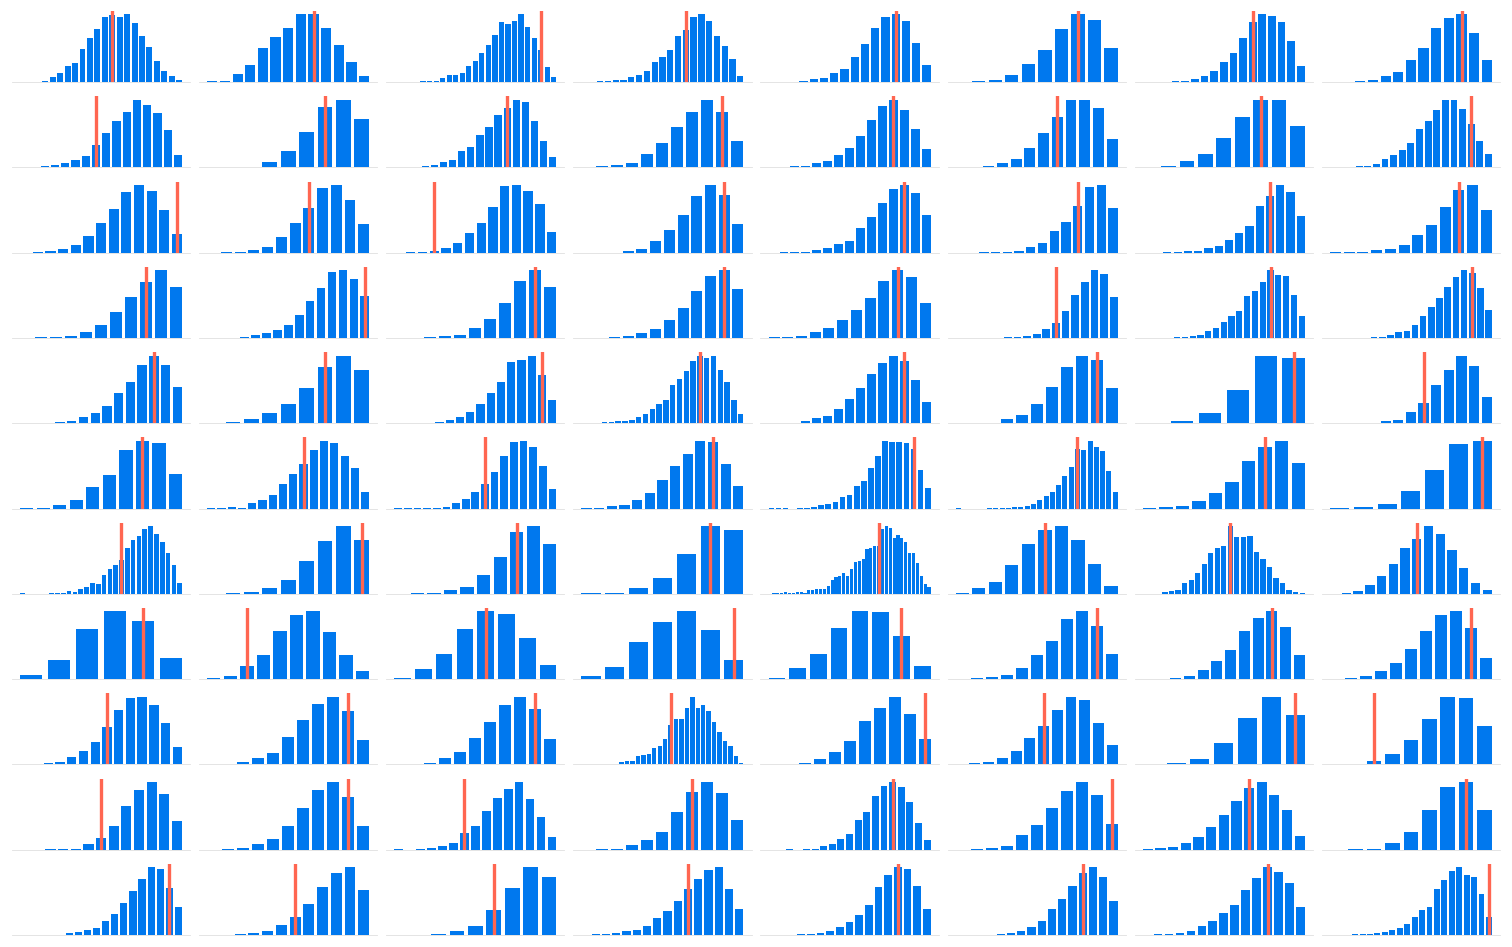

In [76]:
fig, axes = plt.subplots(11, 8, figsize=(16, 10), gridspec_kw={"wspace": 0.05})

for i, ax in enumerate(axes.ravel()):
    draws = (
        idata_grasshopper_bb
        .posterior_predictive["p(y, n)"]
        .sel({"p(y, n)_obs": i})
        .to_numpy()
        .flatten()
    )
    x, counts = np.unique(draws, return_counts=True)
    ax.bar(x, counts / counts.sum());
    ax.axvline(df_grasshopper.loc[i]["y"], color="C4", lw=2)
    ax.set_xticks([])
    ax.set_yticks([])

Reaching the end of the section, we get the posterior predictive distribution for every observation in the dataset and compare it to the observed count. 

This visualization looks so similar to the one we got in the previous section. It's hard to tell what's the difference by eye. But there are some differences, for sure.

An approach I like is to take a specific panel, which represents a grasshopper model, and compare it with the same panel in the same plot of the previous section. For example, take the panel on the second row of the first column. Previously, the observed value was falling in the left tail of the distribution. Now, it's still on the left side of it, but since the variability of the posterior predictive distribution is larger, the observed value is more likely under the eyes of our model. 

After all, since we are using a model that allows for extra binomial dispersion, this increase in the dispersion is to be expected.

## Our numerical summary, again

In [77]:
y_hdi = az.hdi(idata_grasshopper_bb.posterior_predictive, hdi_prob=0.95)["p(y, n)"].to_numpy()
y_obs = df_grasshopper["y"].to_numpy()
is_within_hdi = (y_obs >= y_hdi[:, 0]) & (y_obs <= y_hdi[:, 1])
round(is_within_hdi.mean(), 4)

0.9773

We can compute the coverage of the posterior predictive distribution using the beta binomial model. It's exactly the same approach we used with the binomial model. Even the code is the same! The only thing that changes is the inference data object. 

Have a look at the result. The proportion of observed values within the 95% HDIs is now 97%, larger than what we had with the binomial model. That's great news! The modeling effort is finally paying off! 

## There's no free-lunch

In [78]:
var_binomial = idata_grasshopper.posterior_predictive["p(y, n)"].var(("chain", "draw")).to_numpy()
var_bb = idata_grasshopper_bb.posterior_predictive["p(y, n)"].var(("chain", "draw")).to_numpy()

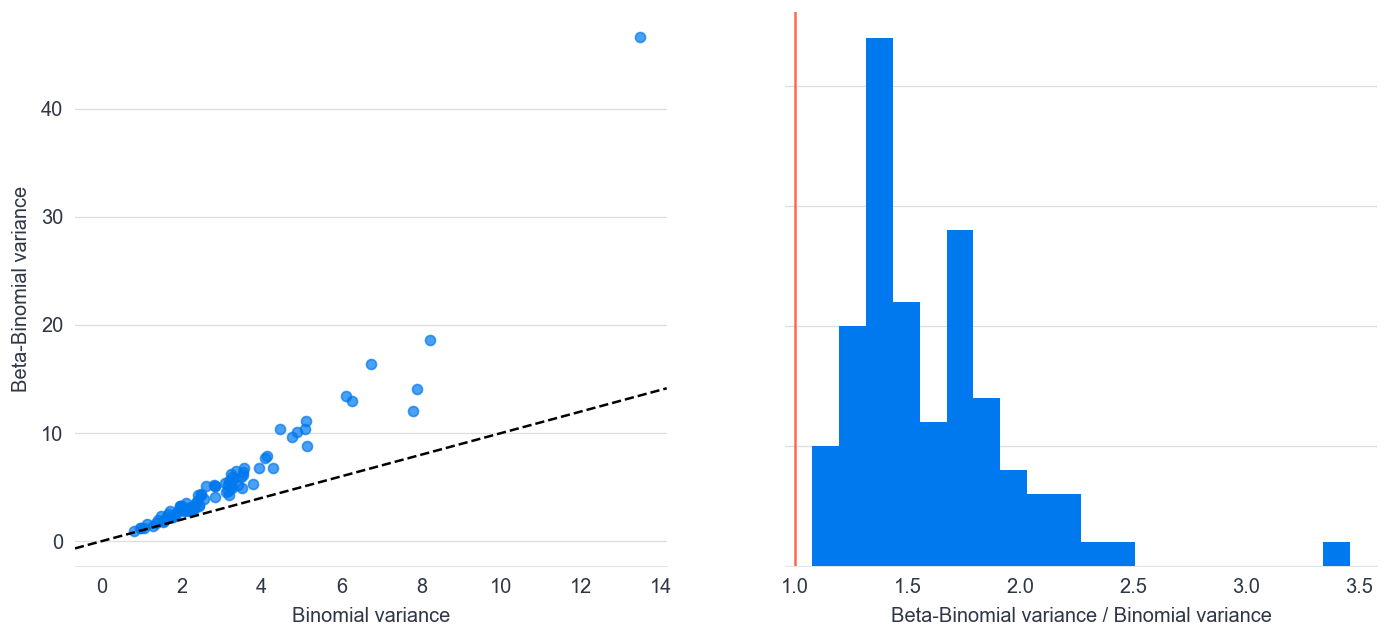

In [79]:
fig, axes = plt.subplots(1, 2, figsize = (14, 6))
axes[0].scatter(var_binomial, var_bb, alpha=0.7)
axes[0].axline((0, 0), (1, 1), color="black", ls="--")
axes[0].set(xlabel="Binomial variance", ylabel="Beta-Binomial variance")

axes[1].hist(var_bb / var_binomial, color="C0", bins=20)
axes[1].axvline(1, color="C4")
axes[1].set(xlabel="Beta-Binomial variance / Binomial variance", yticklabels=[]);

Oh, do you remember what I said earlier? There's no free lunch, and here we have a very conclusive visualization.

While the coverage of the beta binomial model is better than the one from the binomial model, we're paying a price for it. The same kind of price we paid in the admissions problem. For every grasshopper mom, the variance of the posterior predictive distribution is larger under the beta binomial model. In other words, with exactly the same data, the predictions we get predictions are more uncertain.

Is this always a bad thing? We're going to talk about this in more depth in the following section. For now, I can give you a short answer: not necessarily. 

Well, we've done a tremendous effort so far. Let's jump into the section recap.

## Section Recap

* We created a beta-binomial model for the grasshoppers data
* Inferences don't vary significantly
* The more flexible model is slightly better than the original
* The variance increase is not always negligible
* We covered one approach to this problem
    * Other approach: Hierarchical models

# Lesson Recap

## 12 segundos de oscuridadad

* Statistics can be difficult

* Hard work pays off

## Unanticipated consequences

* New data: lake sizes and number of fish species

* We created a Poisson regression model

* We found unanticipated problems

## What's the deal with overdispersion

* The dispersion in the data is **larger** than the one implied by the model

* We get optimistic answers

* Makes it harder to detect effects of interest
    * It's there, we don't see it
    * It's not there, we think we see it

## When the whole is more than the sum of the parts

* We can compound distributions to get new distributions

* Gamma-Poisson compound (aka Negative Binomial)

* It allows the variance to be larger than the mean

## Negative Binomial regression

* A model for count responses, just like Poisson regression

* Extra flexibility as the variance can differ from the mean 

* Easy to work with in Bambi
    * Also in PyMC

## Overdispersion for all

* Overdispersion can appear in more settings
    * In general, whenever the variance is not given by a single parameter
    * In particular, in many models for count responses

* Introduced a new dataset: admissions data

* We built a binomial model to estimate gender effect

* We found males were more likely to be admitted

* We also found the model was not accounting for enough variance (i.e. overdispersion)

## Beta-Binomial to the rescue

* As with the Poisson distribution, the Binomial is also part of the solution

* We obtained the Beta-Binomial distribution

* Allows for extra variation in the Binomial setting

## The Beta-Binomial model in action

* Used the beta-binomial distribution with the admissions dataset

* We found there was no gender effect
    * Consistent with the EDA

* The variability in the posterior predictive distributions is large

* It was an invented problem: we omitted an important variable

## Counting grasshoppers

* Grasshopper data 
    * Detect a chromosome in the descendants of a mother
    * Different dates and locations

* Built a binomial regression model

* Used the coverage of the posterior predictive distribution to detect overdispersion

* Small to moderate overdispersion
    * No variables were omitted this time!

## Beta-Binomial for grasshoppers

* Performed prior elicitation

* Model fit and posterior predictive coverage improved

* More flexible models come with a cost
    * The variance is up to three times larger than with the binomial model

* Open the door to a new approach: hierarchical models